# **ResNet Like CNN**
## Dataset:CIFAR10
## Comparison between BatchNormalization, LayerNormalization and GroupNormalization in Image Processing.

## **Network Implementation**

Importing Libraries

In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation, Conv2D, MaxPooling2D  , Softmax, BatchNormalization, LayerNormalization , Add, Flatten
from tensorflow_addons.layers import GroupNormalization
from keras.models import Sequential
from keras import optimizers
import tensorflow
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Importing drive for save models and pictures:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Datset**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


**Preprocessing**

Binary Codding Labels:

In [ ]:
y_train_b=np.zeros((len(y_train),10))
y_test_b=np.zeros((len(y_test),10))

for i in range (0,len(y_train)):
  for j in range (0,10):
    if (y_train[i]==j):
      y_train_b[i,j]=1

for i in range (0,len(y_test)):
  for j in range (0,10):
    if (y_test[i]==j):
      y_test_b[i,j]=1

Normalization "min-max scaling"

In [ ]:
x_train_n = x_train/255.0
x_test_n = x_test/255.0

Choose validation data

In [ ]:
x_train_n, x_val_n, y_train_b, y_val_b = train_test_split(x_train_n, y_train_b,test_size=0.1,random_state=0)

Define a ResNet like Network Designer function:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)                                        #2
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)                                        #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)                                        #15
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

Define Model, Optimizer and Loss Function:

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Summary of The Model:

In [ ]:
model_1.summary()

Model: "ResNet_Like"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 32, 32, 64)   18496       ['elu_1[0][0]']                  
                                                                                        

Plot The Model:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


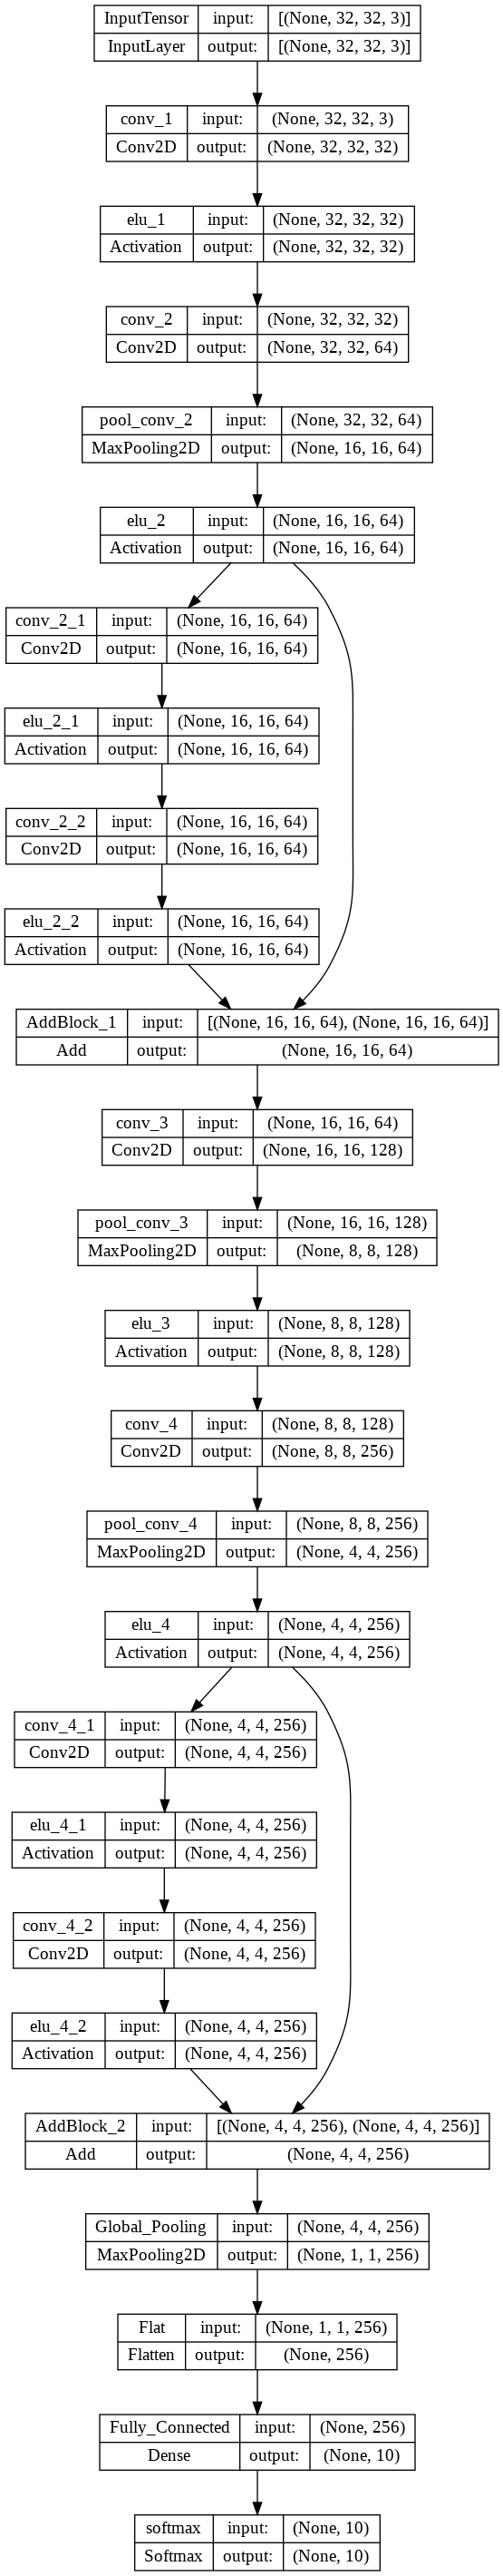

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model.png", show_shapes=True)

Train The Midel:

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=25 , validation_data=(x_val_n, y_val_b))

Epoch 1/25
88/88 [==============================] - 8s 85ms/step - loss: 2.2074 - accuracy: 0.2070 - val_loss: 2.0556 - val_accuracy: 0.2884
Epoch 2/25
88/88 [==============================] - 7s 81ms/step - loss: 2.0231 - accuracy: 0.2834 - val_loss: 1.9516 - val_accuracy: 0.3194
Epoch 3/25
88/88 [==============================] - 7s 82ms/step - loss: 1.9020 - accuracy: 0.3276 - val_loss: 1.8210 - val_accuracy: 0.3438
Epoch 4/25
88/88 [==============================] - 7s 81ms/step - loss: 1.7971 - accuracy: 0.3661 - val_loss: 1.8426 - val_accuracy: 0.3410
Epoch 5/25
88/88 [==============================] - 7s 80ms/step - loss: 1.7237 - accuracy: 0.3924 - val_loss: 1.6404 - val_accuracy: 0.4164
Epoch 6/25
88/88 [==============================] - 7s 80ms/step - loss: 1.6475 - accuracy: 0.4180 - val_loss: 1.5916 - val_accuracy: 0.4360
Epoch 7/25
88/88 [==============================] - 7s 80ms/step - loss: 1.5882 - accuracy: 0.4401 - val_loss: 1.6007 - val_accuracy: 0.4250
Epoch 8/25
88

Save Trained Model:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_1.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


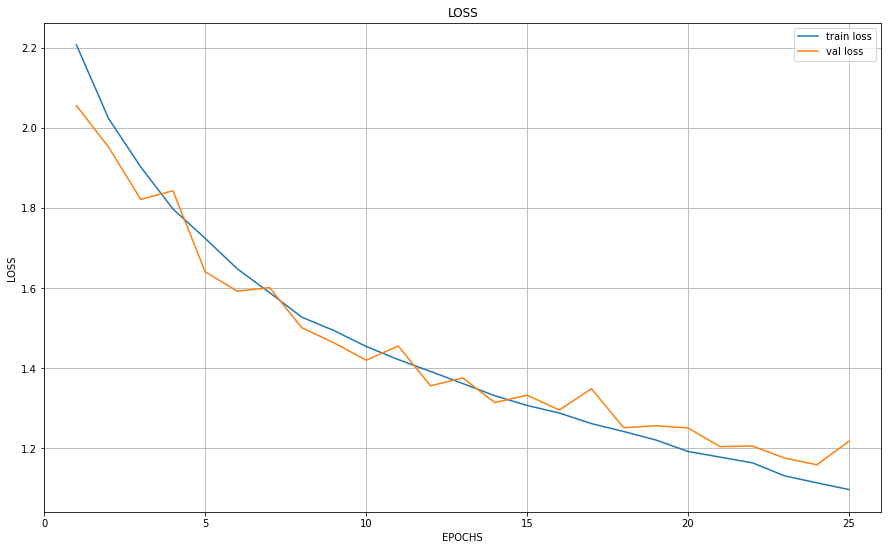

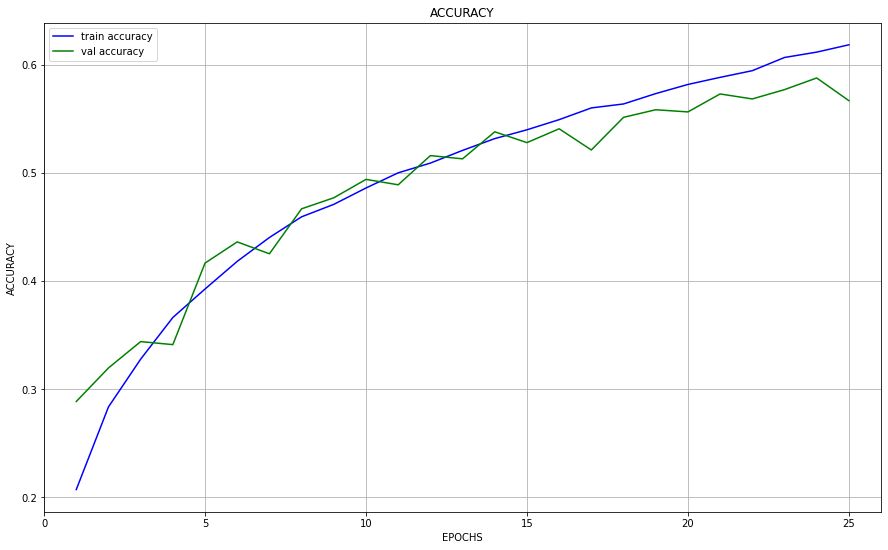

In [ ]:
drive.mount('/content/drive')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,26)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,26])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_1_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,26])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_1_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 2s 5ms/step - loss: 1.2199 - accuracy: 0.5657
[1.219854474067688, 0.5656999945640564]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 1s 3ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


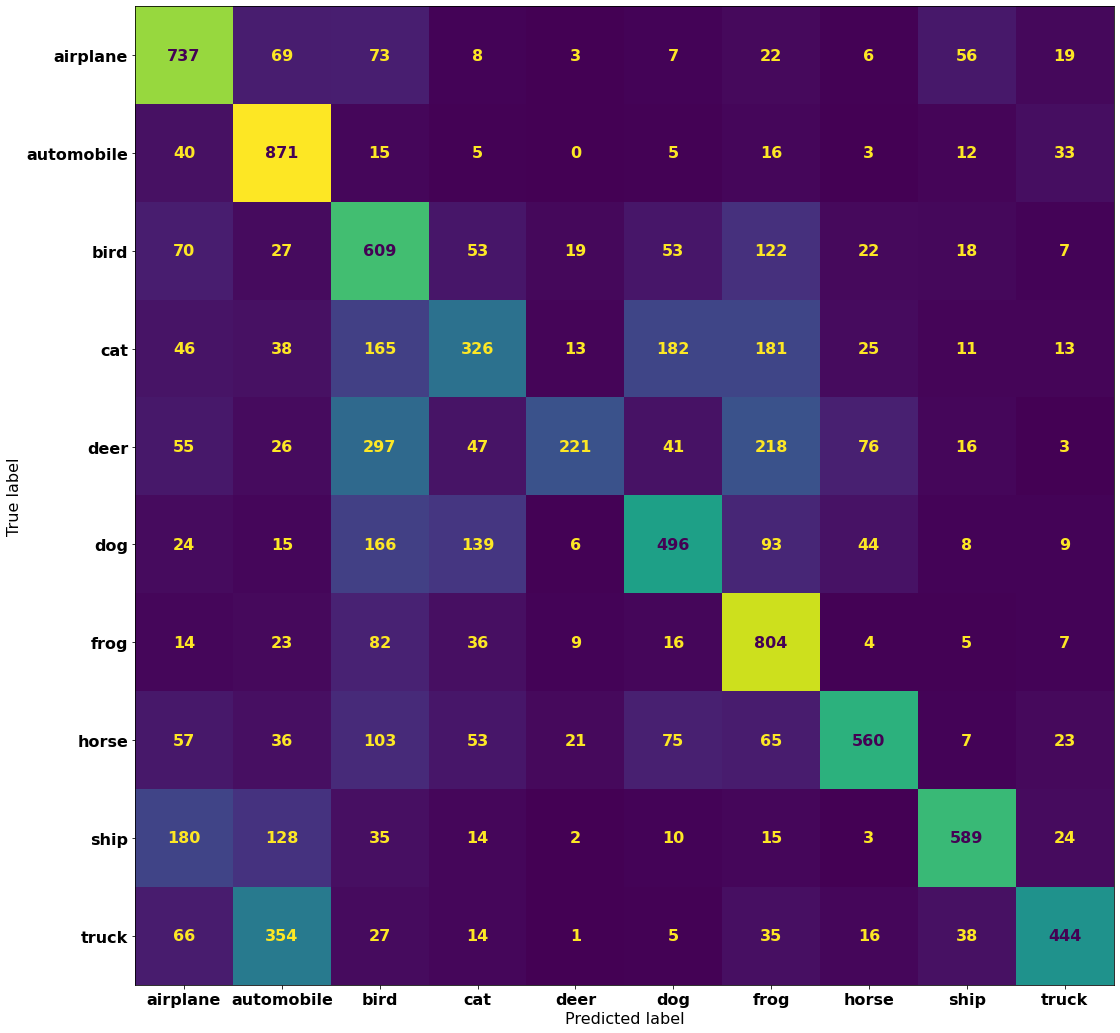

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_1.jpg')
#

Define Model, Optimizer and Loss Function Again:




In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Train The Midel(100 Epock):

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=100 , validation_data=(x_val_n, y_val_b))

Epoch 1/100
88/88 [==============================] - 8s 83ms/step - loss: 2.2222 - accuracy: 0.2117 - val_loss: 2.1140 - val_accuracy: 0.2986
Epoch 2/100
88/88 [==============================] - 7s 81ms/step - loss: 2.0397 - accuracy: 0.2912 - val_loss: 1.9651 - val_accuracy: 0.2922
Epoch 3/100
88/88 [==============================] - 7s 81ms/step - loss: 1.9169 - accuracy: 0.3234 - val_loss: 1.8316 - val_accuracy: 0.3532
Epoch 4/100
88/88 [==============================] - 7s 79ms/step - loss: 1.8239 - accuracy: 0.3550 - val_loss: 1.7551 - val_accuracy: 0.3806
Epoch 5/100
88/88 [==============================] - 7s 79ms/step - loss: 1.7496 - accuracy: 0.3850 - val_loss: 1.7054 - val_accuracy: 0.3948
Epoch 6/100
88/88 [==============================] - 7s 78ms/step - loss: 1.6780 - accuracy: 0.4104 - val_loss: 1.6171 - val_accuracy: 0.4236
Epoch 7/100
88/88 [==============================] - 7s 78ms/step - loss: 1.6108 - accuracy: 0.4312 - val_loss: 1.6339 - val_accuracy: 0.4158
Epoch 

Save Trained Model:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_2.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


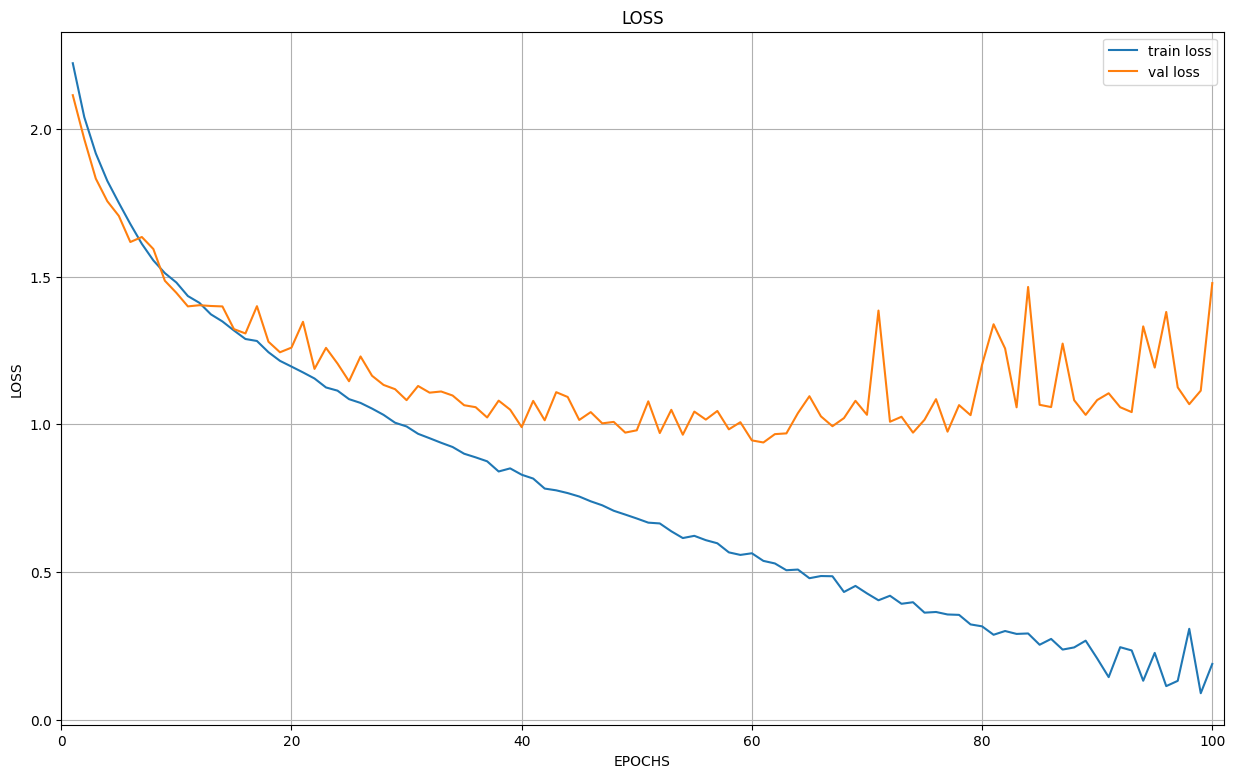

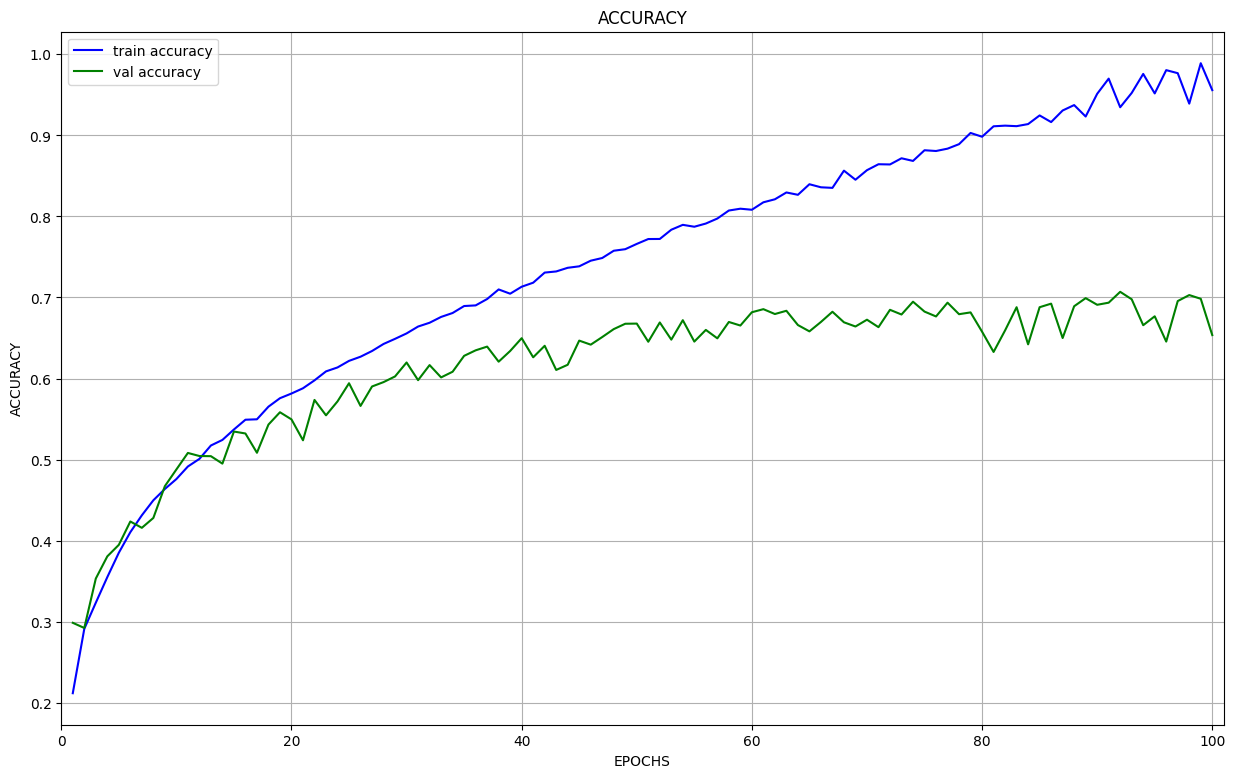

In [ ]:
drive.mount('/content/drive')

import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_2_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_2_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 1s 5ms/step - loss: 1.5099 - accuracy: 0.6489
[1.5099115371704102, 0.6488999724388123]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 1s 3ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


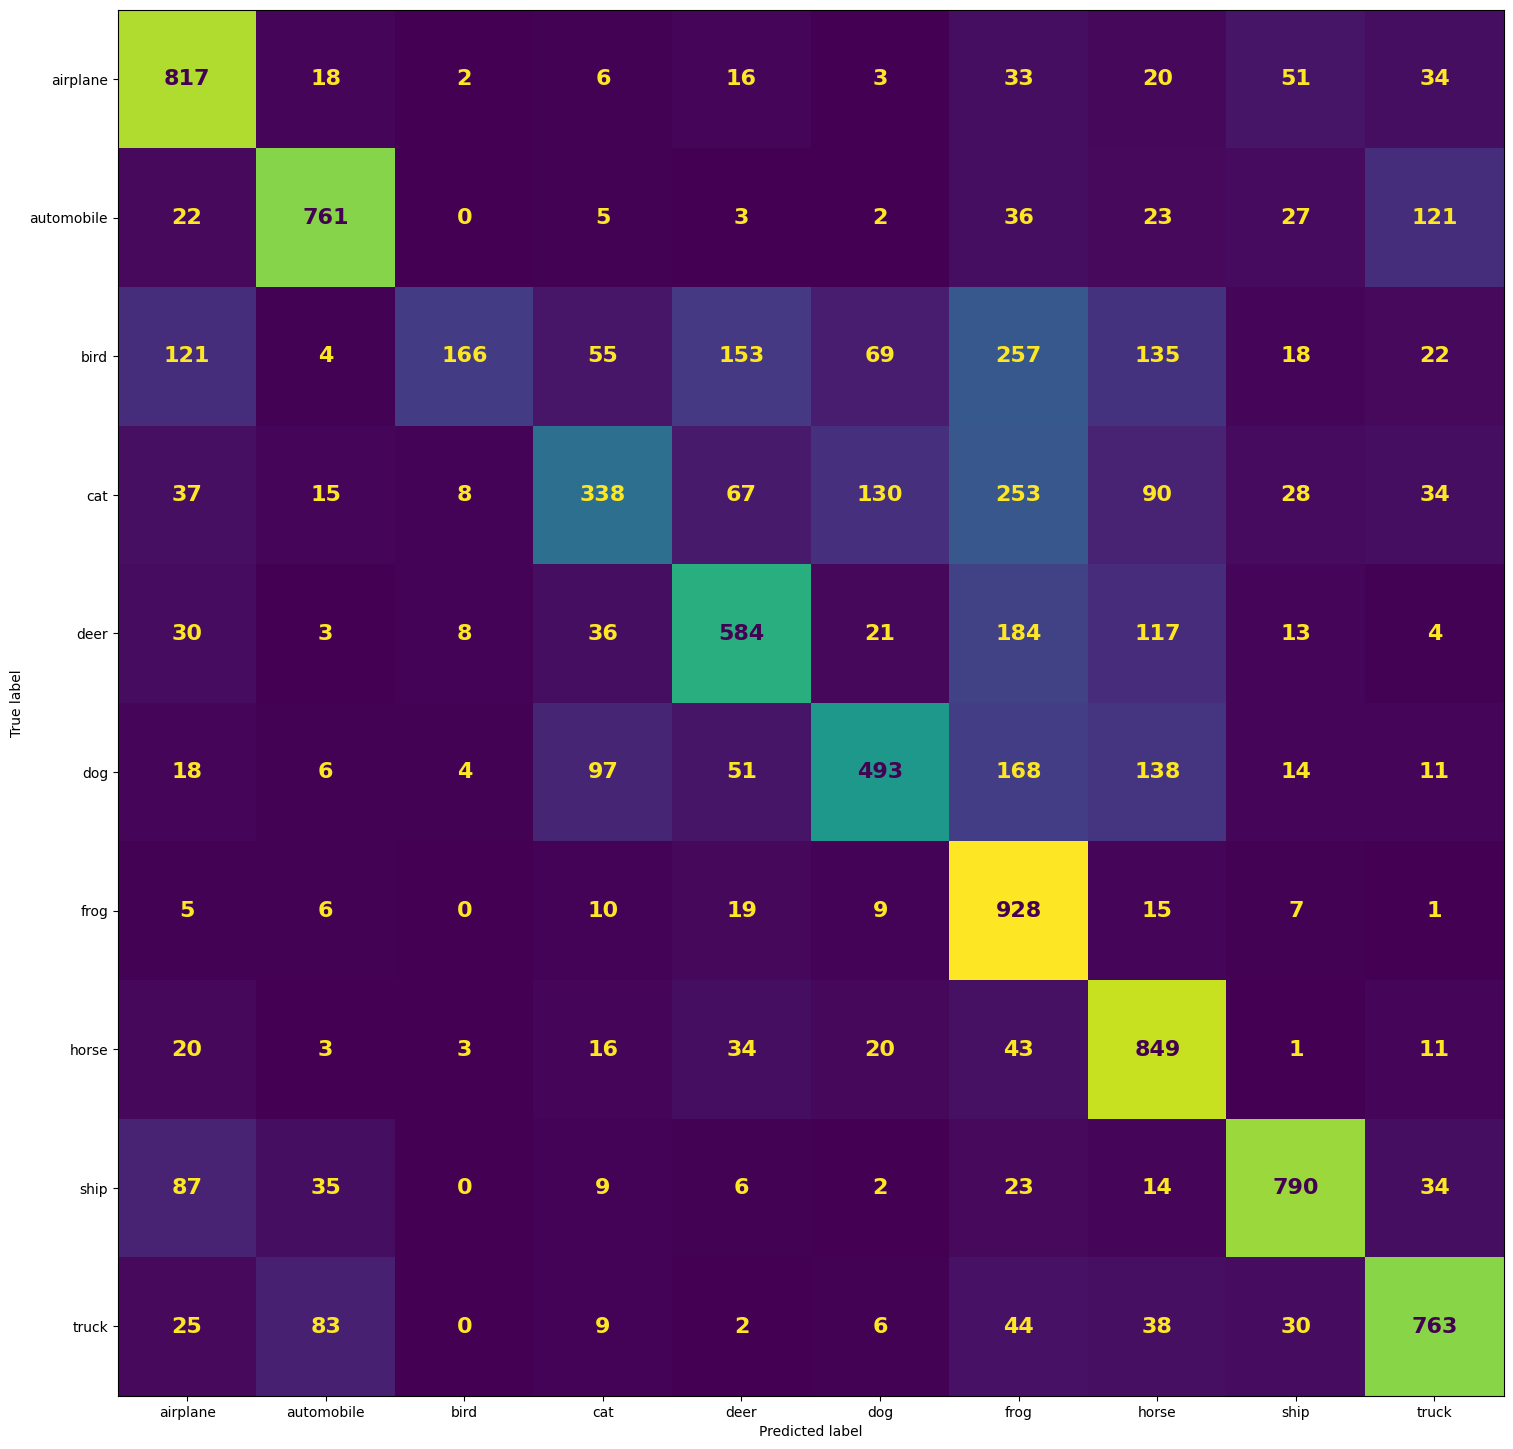

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_2.jpg')
#

# Problem 1:

## Batch Normalization Effect:

Define a ResNet like Network Designer function with BN Layers:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)                                        #2
  x = BatchNormalization(name='BN_1')(x)
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)
  x = BatchNormalization(name='BN_2')(x)                                        #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  x = BatchNormalization(name='BN_3')(x)
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  x = BatchNormalization(name='BN_4')(x)
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)                                        #15
  x = BatchNormalization(name='BN_5')(x)
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = BatchNormalization(name='BN_6')(x)
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

Define Model, Optimizer and Loss Function:

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like_BN")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Summary of The Model:

In [ ]:
model_1.summary()

Model: "ResNet_Like_BN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 BN_1 (BatchNormalization)      (None, 32, 32, 32)   128         ['elu_1[0][0]']                  
                                                                                     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


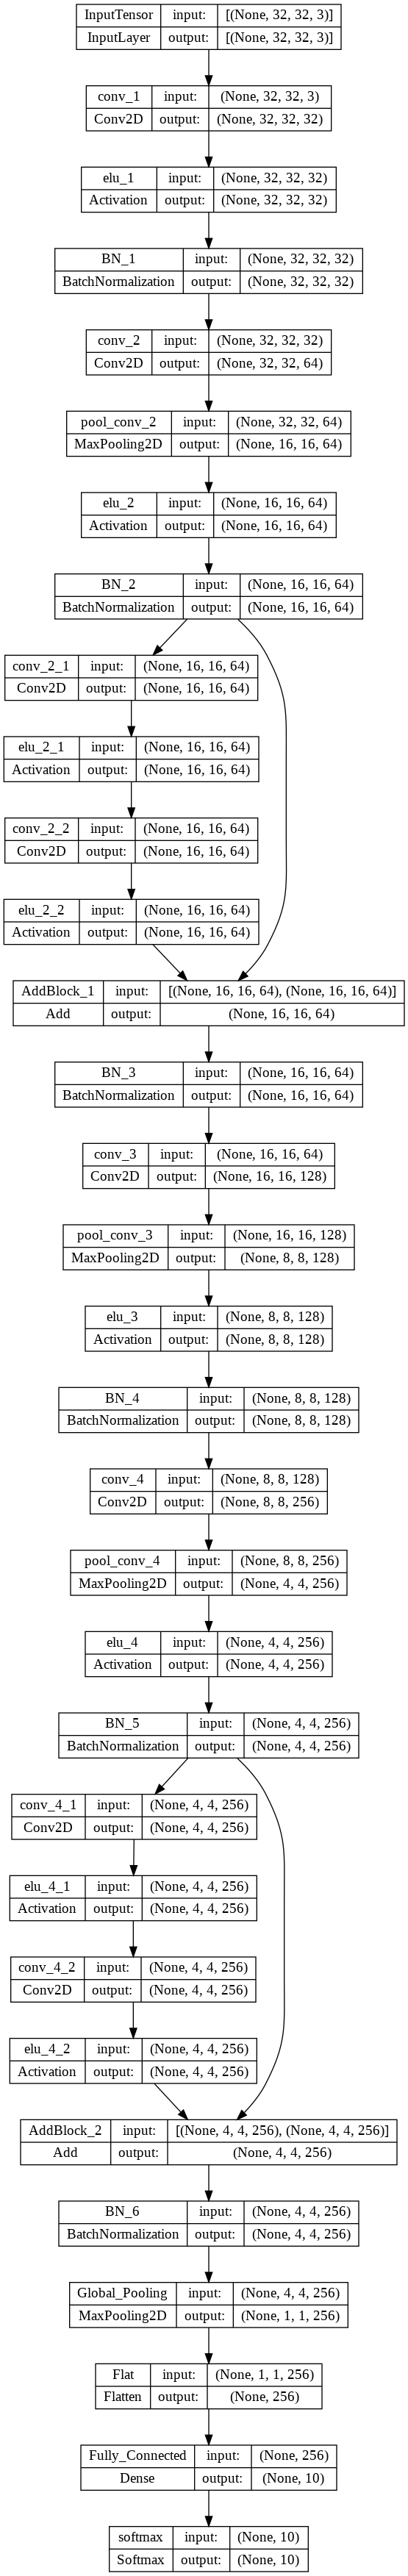

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model_BN.png", show_shapes=True)

Train The Midel:

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=100 , validation_data=(x_val_n, y_val_b))

Epoch 1/100
88/88 [==============================] - 20s 106ms/step - loss: 1.6710 - accuracy: 0.4233 - val_loss: 2.5090 - val_accuracy: 0.1148
Epoch 2/100
88/88 [==============================] - 7s 81ms/step - loss: 1.2552 - accuracy: 0.5613 - val_loss: 2.7613 - val_accuracy: 0.1182
Epoch 3/100
88/88 [==============================] - 7s 81ms/step - loss: 1.1144 - accuracy: 0.6142 - val_loss: 2.5708 - val_accuracy: 0.1716
Epoch 4/100
88/88 [==============================] - 7s 81ms/step - loss: 1.0168 - accuracy: 0.6512 - val_loss: 1.9866 - val_accuracy: 0.2692
Epoch 5/100
88/88 [==============================] - 7s 82ms/step - loss: 0.9393 - accuracy: 0.6810 - val_loss: 1.5097 - val_accuracy: 0.4524
Epoch 6/100
88/88 [==============================] - 7s 84ms/step - loss: 0.8743 - accuracy: 0.7043 - val_loss: 1.1765 - val_accuracy: 0.5804
Epoch 7/100
88/88 [==============================] - 8s 86ms/step - loss: 0.8144 - accuracy: 0.7297 - val_loss: 1.0657 - val_accuracy: 0.6254
Epoc

Save Trained Model:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_BN.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


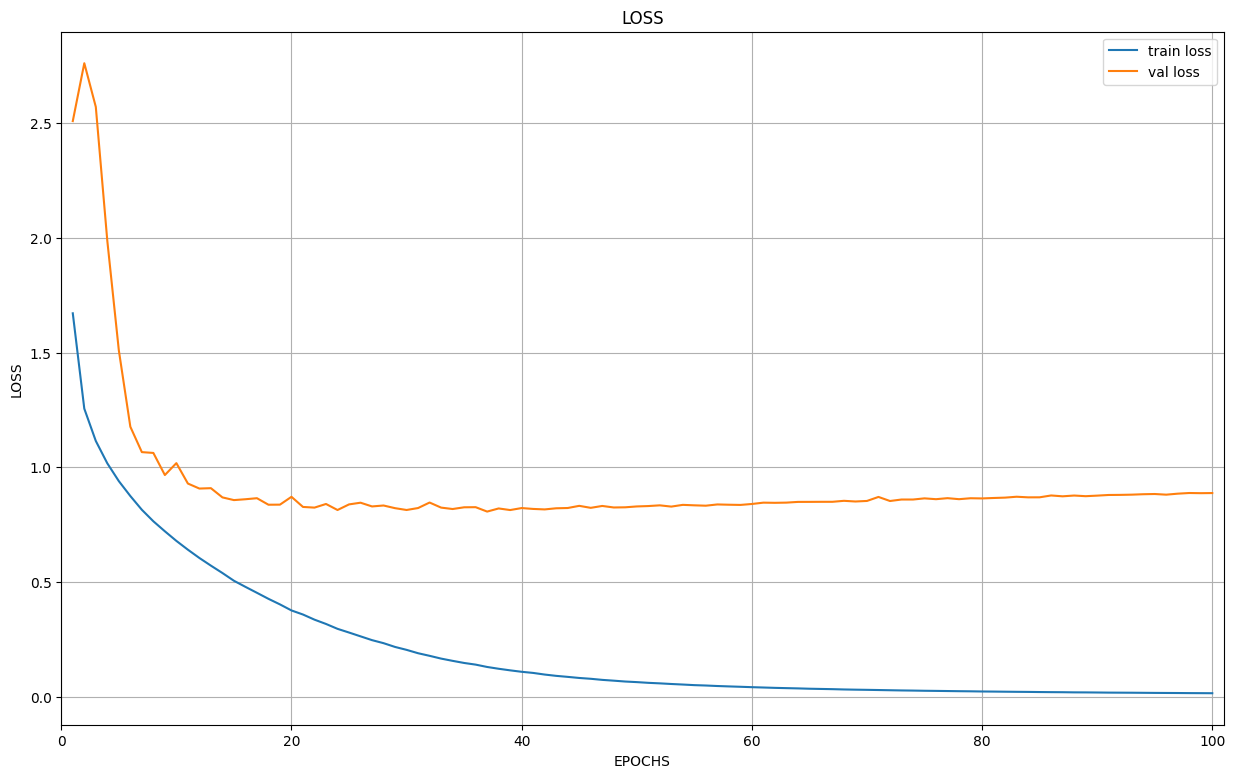

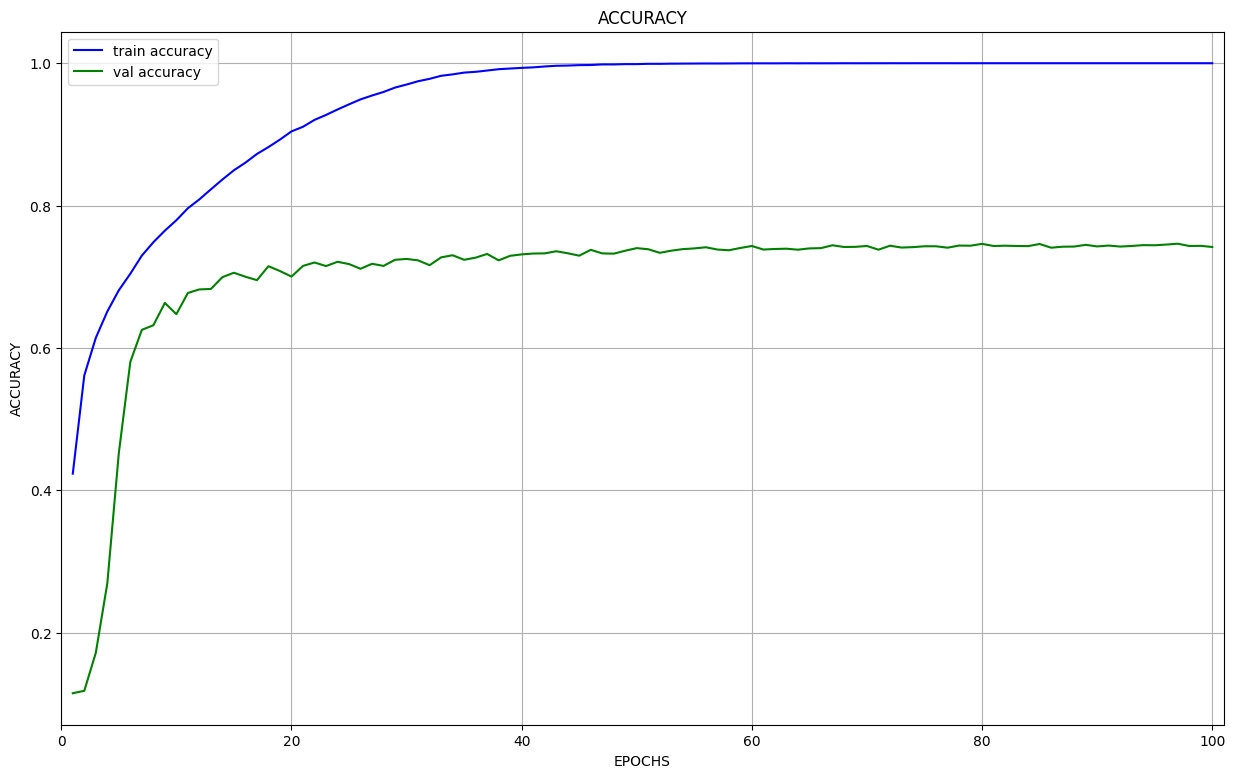

In [ ]:
drive.mount('/content/drive')
import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_BN_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_BN_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 2s 5ms/step - loss: 0.9341 - accuracy: 0.7366
[0.9341235160827637, 0.7365999817848206]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 1s 3ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


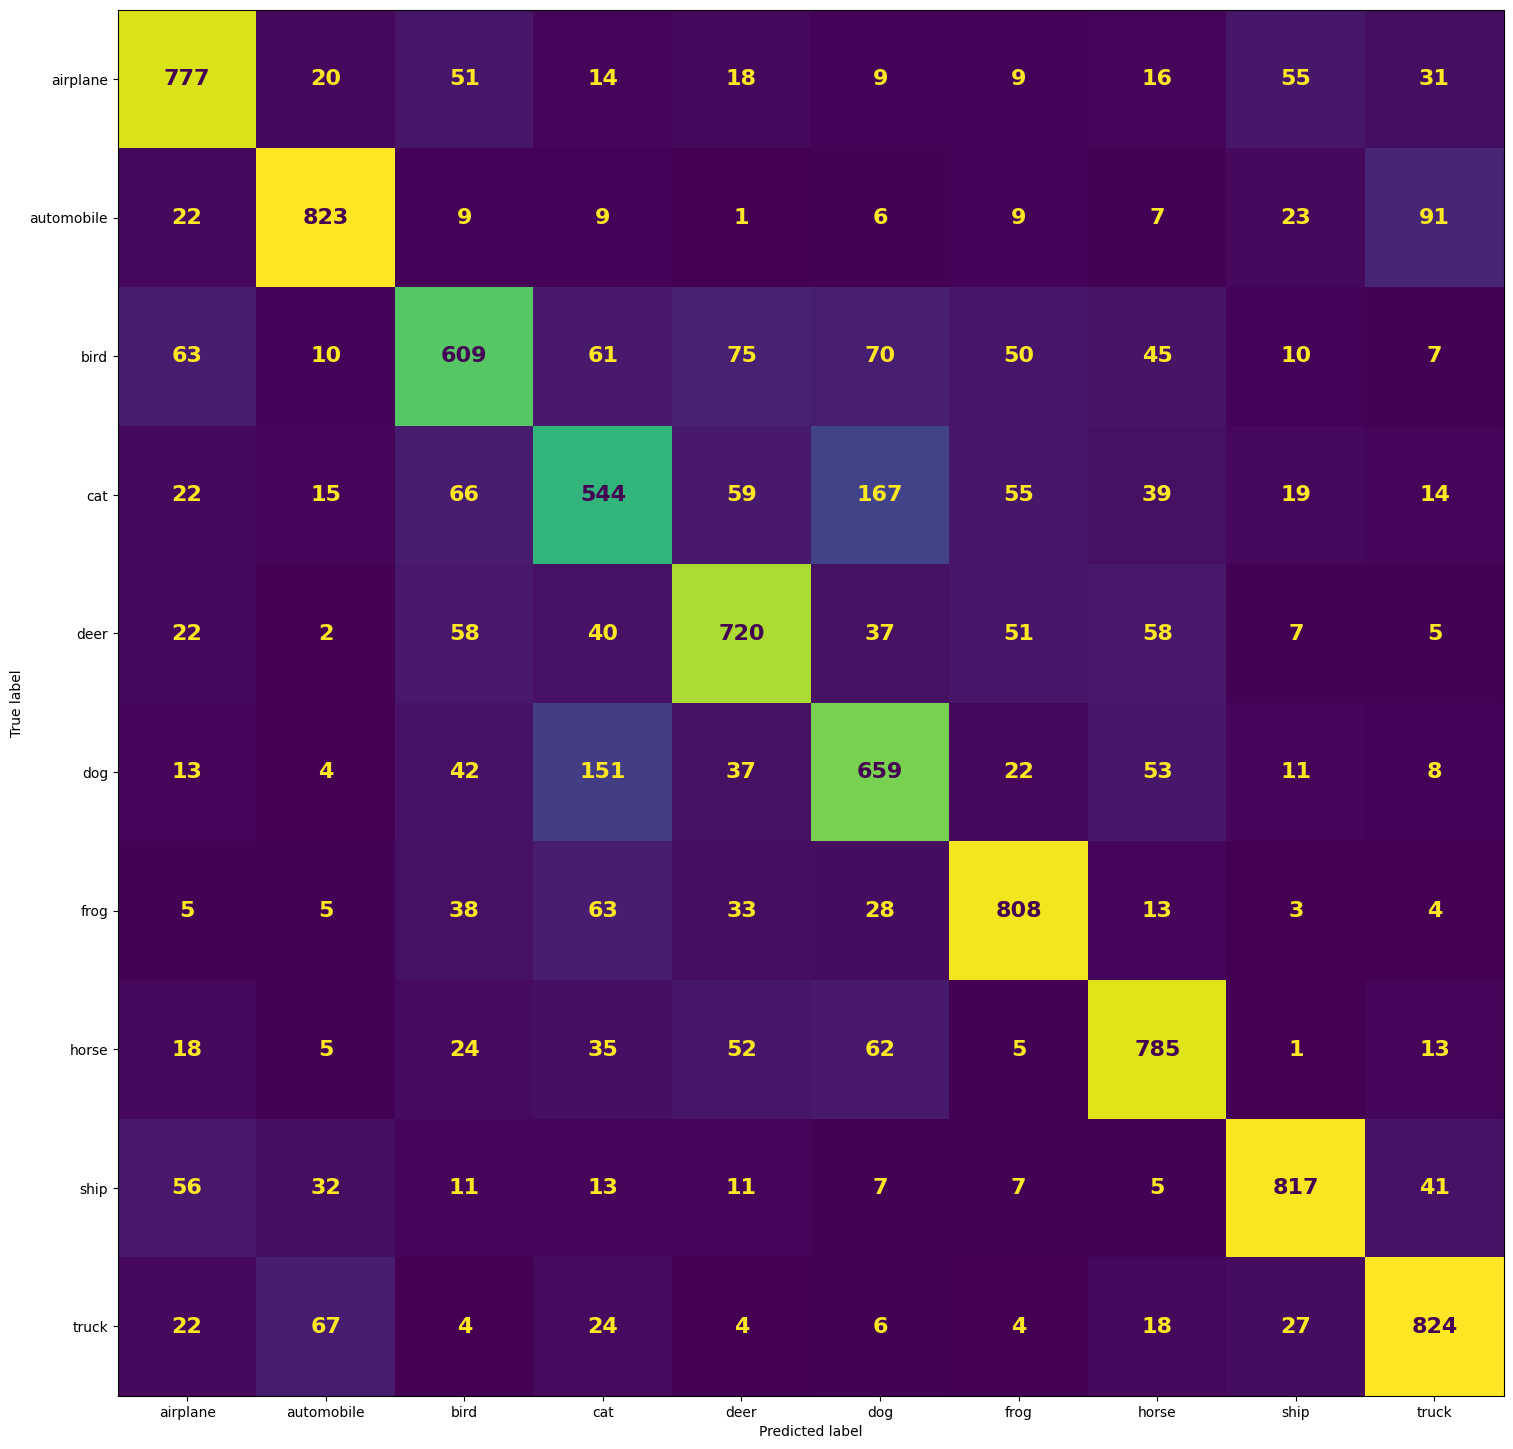

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_BN.jpg')
#

## Layer Normalization Effect:

Define a ResNet like Network Designer function with LN Layers:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)                                        #2
  x = LayerNormalization(name='LN_1')(x)
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)
  x = LayerNormalization(name='LN_2')(x)                                        #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  x = LayerNormalization(name='LN_3')(x)
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  x = LayerNormalization(name='LN_4')(x)
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)                                        #15
  x = LayerNormalization(name='LN_5')(x)
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = LayerNormalization(name='LN_6')(x)
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like_LN")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "ResNet_Like_LN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 LN_1 (LayerNormalization)      (None, 32, 32, 32)   64          ['elu_1[0][0]']                  
                                                                                     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


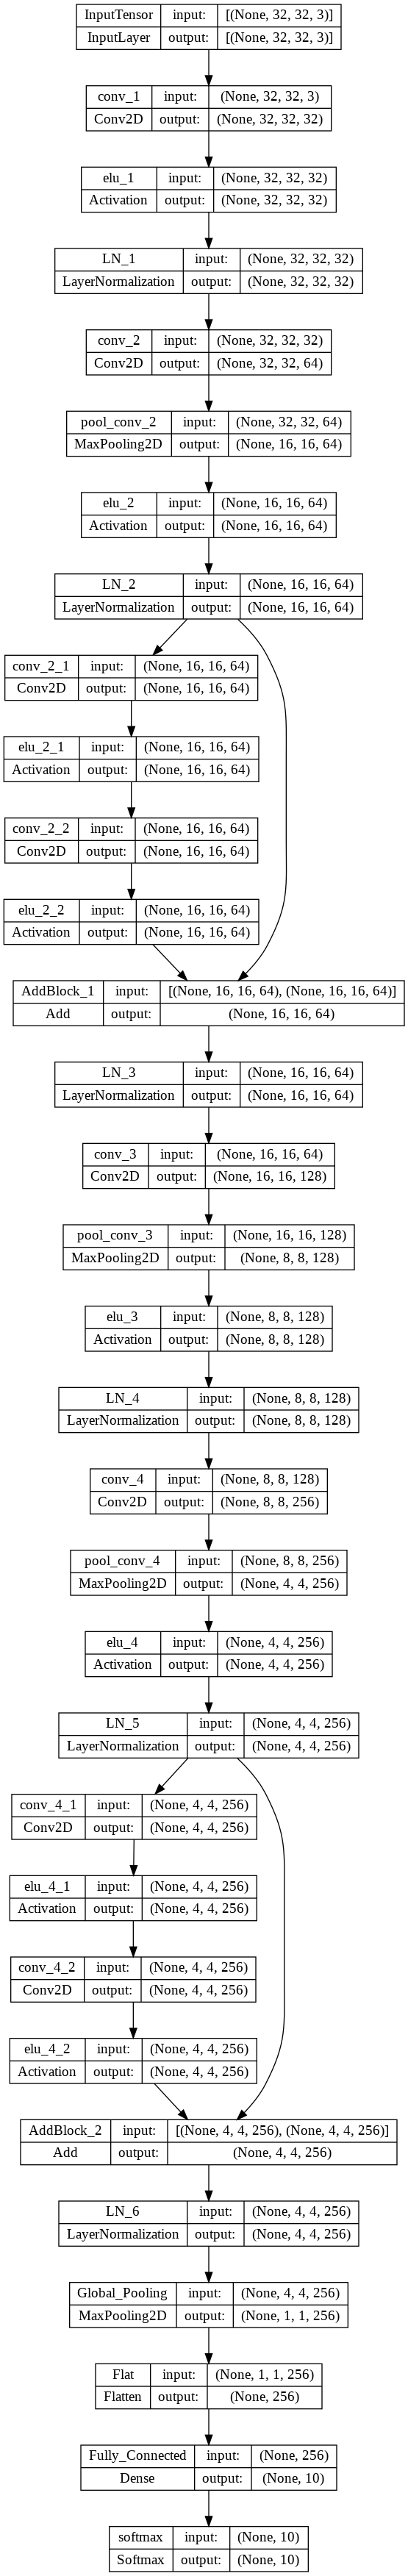

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model_LN.png", show_shapes=True)

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=100 , validation_data=(x_val_n, y_val_b))

Epoch 1/100
88/88 [==============================] - 27s 177ms/step - loss: 2.4804 - accuracy: 0.1530 - val_loss: 2.1587 - val_accuracy: 0.1906
Epoch 2/100
88/88 [==============================] - 13s 152ms/step - loss: 2.0085 - accuracy: 0.2730 - val_loss: 1.8006 - val_accuracy: 0.3434
Epoch 3/100
88/88 [==============================] - 14s 154ms/step - loss: 1.7461 - accuracy: 0.3822 - val_loss: 1.6240 - val_accuracy: 0.4326
Epoch 4/100
88/88 [==============================] - 14s 155ms/step - loss: 1.5925 - accuracy: 0.4365 - val_loss: 1.5966 - val_accuracy: 0.4318
Epoch 5/100
88/88 [==============================] - 14s 157ms/step - loss: 1.4557 - accuracy: 0.4849 - val_loss: 1.4540 - val_accuracy: 0.4844
Epoch 6/100
88/88 [==============================] - 14s 159ms/step - loss: 1.3521 - accuracy: 0.5242 - val_loss: 1.3048 - val_accuracy: 0.5360
Epoch 7/100
88/88 [==============================] - 14s 159ms/step - loss: 1.2522 - accuracy: 0.5585 - val_loss: 1.3271 - val_accuracy:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_LN.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


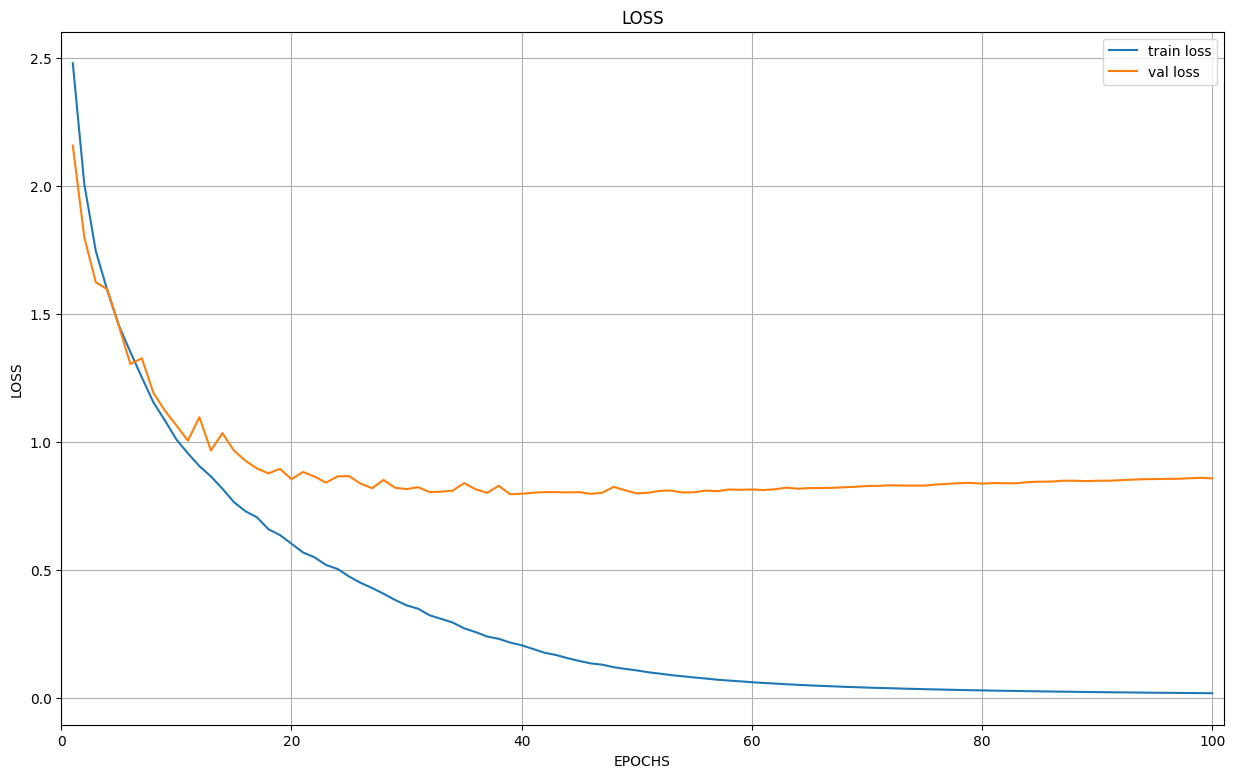

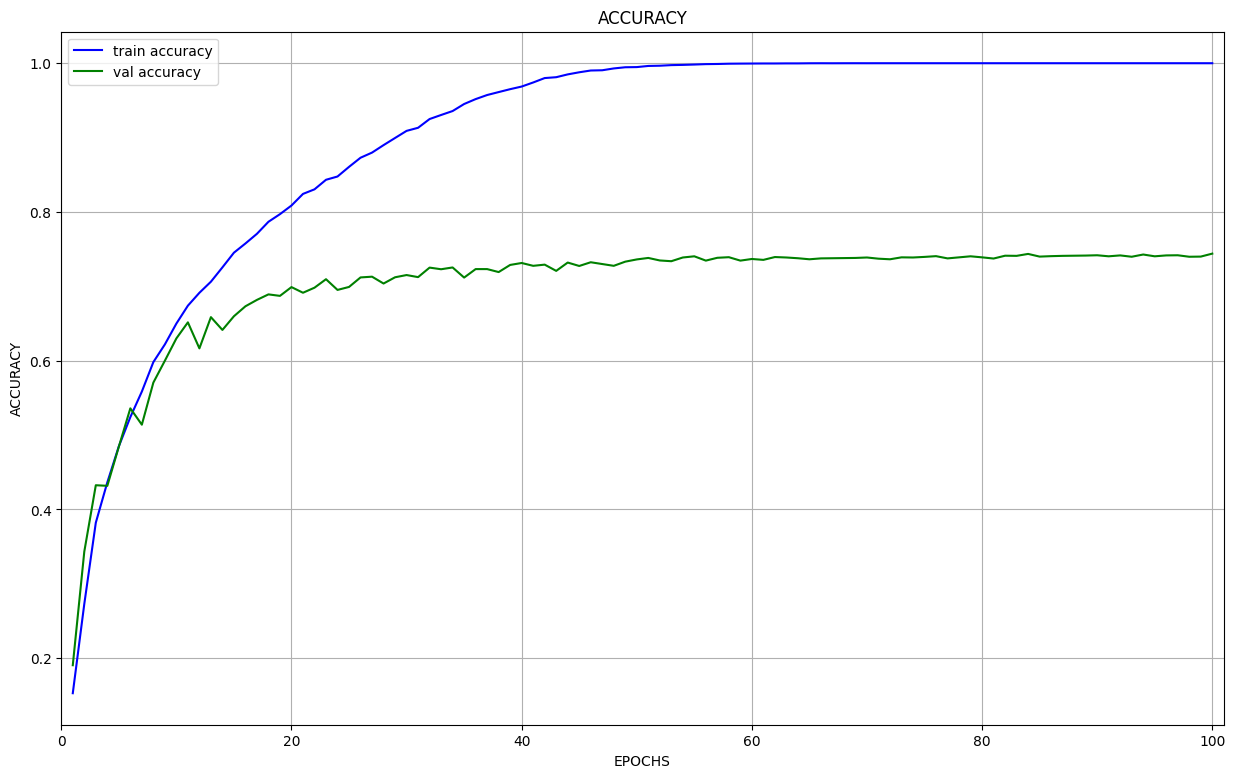

In [ ]:
drive.mount('/content/drive')
import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_LN_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_LN_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 2s 7ms/step - loss: 0.8748 - accuracy: 0.7383
[0.8748433589935303, 0.7383000254631042]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 2s 5ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


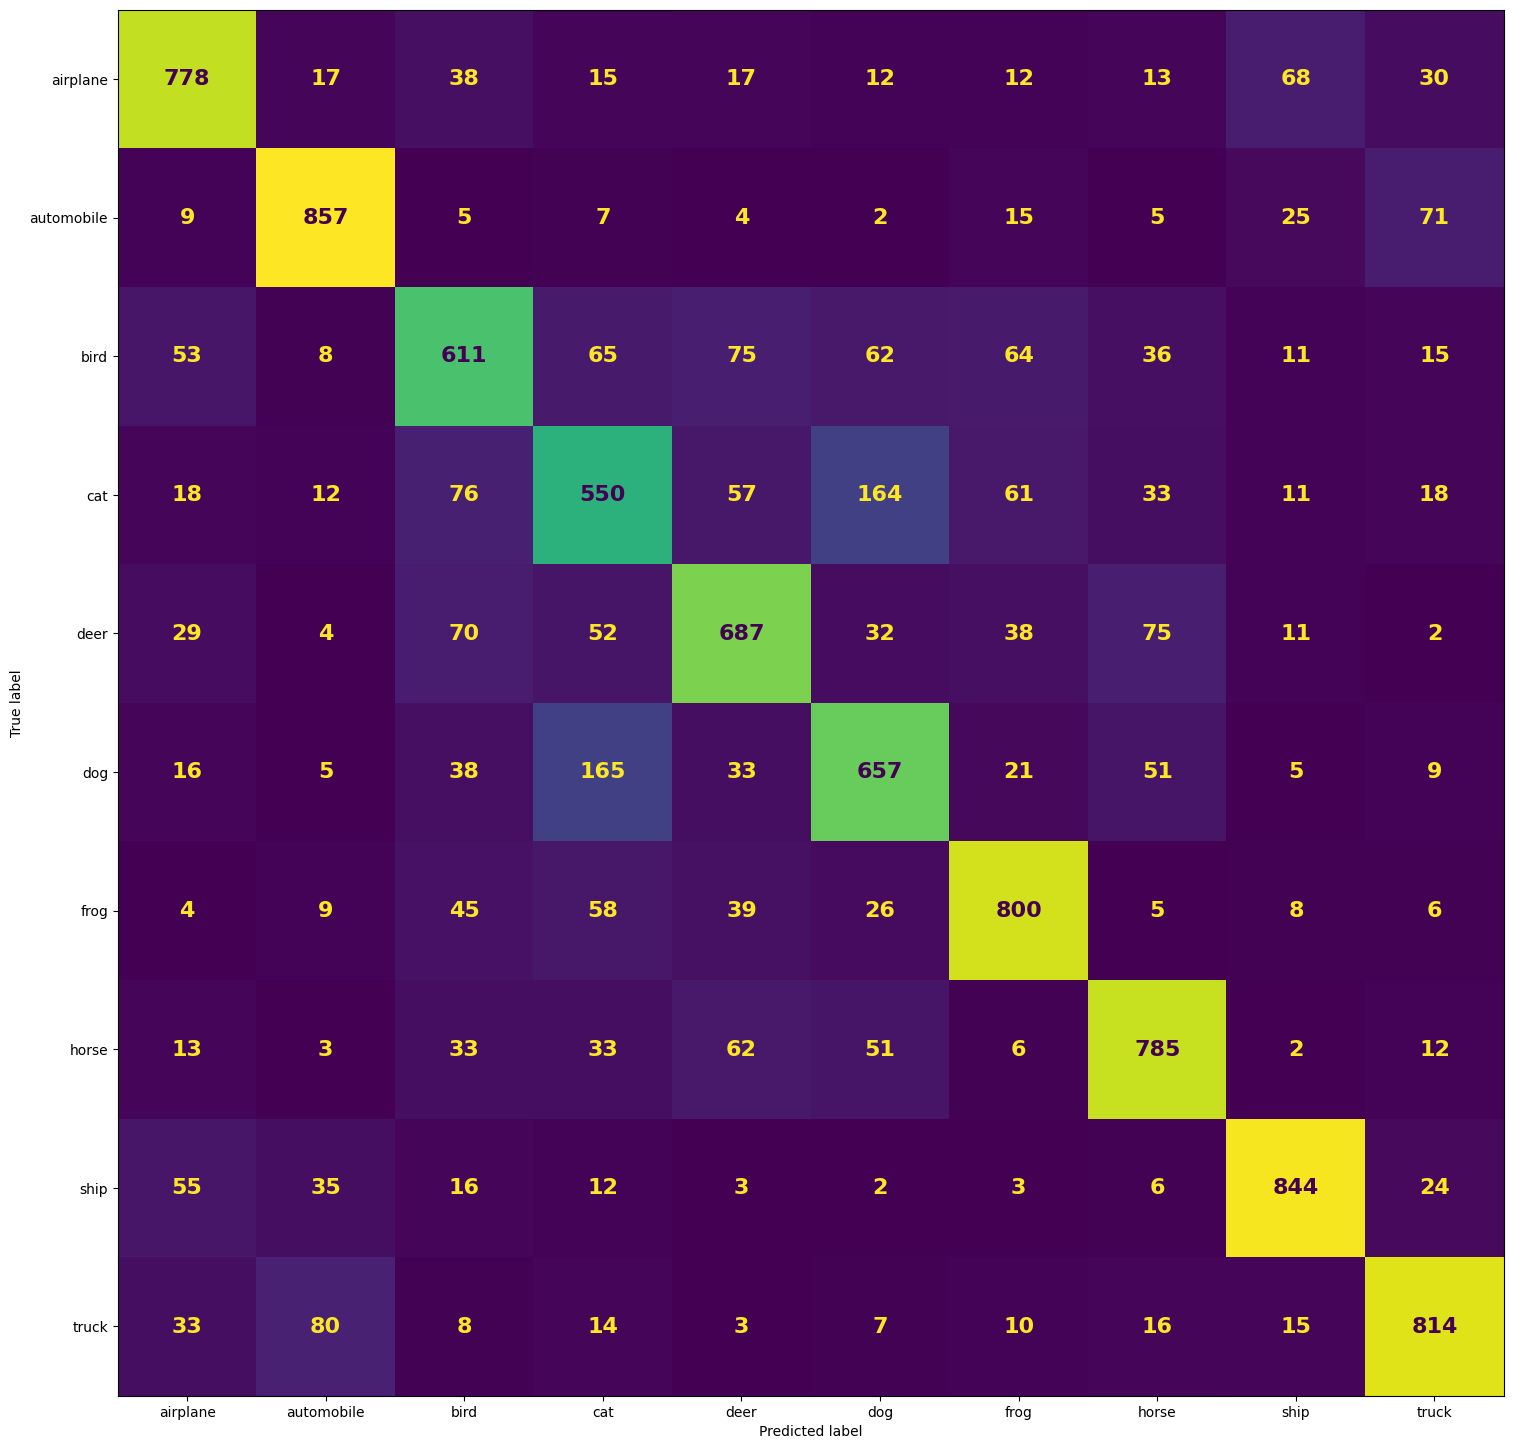

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_LN.jpg')
#

## Group Normalization Effect:

Define a ResNet like Network Designer function with GN Layers:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)                                        #2
  x = GroupNormalization(groups=4 , name='GN_1')(x)
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)
  x = GroupNormalization(groups=4 ,name='GN_2')(x)                                        #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  x = GroupNormalization(groups=4 ,name='GN_3')(x)
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  x = GroupNormalization(groups=4 ,name='GN_4')(x)
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)                                        #15
  x = GroupNormalization(groups=4 ,name='GN_5')(x)
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = GroupNormalization(groups=4 ,name='GN_6')(x)
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like_GN")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "ResNet_Like_GN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 GN_1 (GroupNormalization)      (None, 32, 32, 32)   64          ['elu_1[0][0]']                  
                                                                                     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


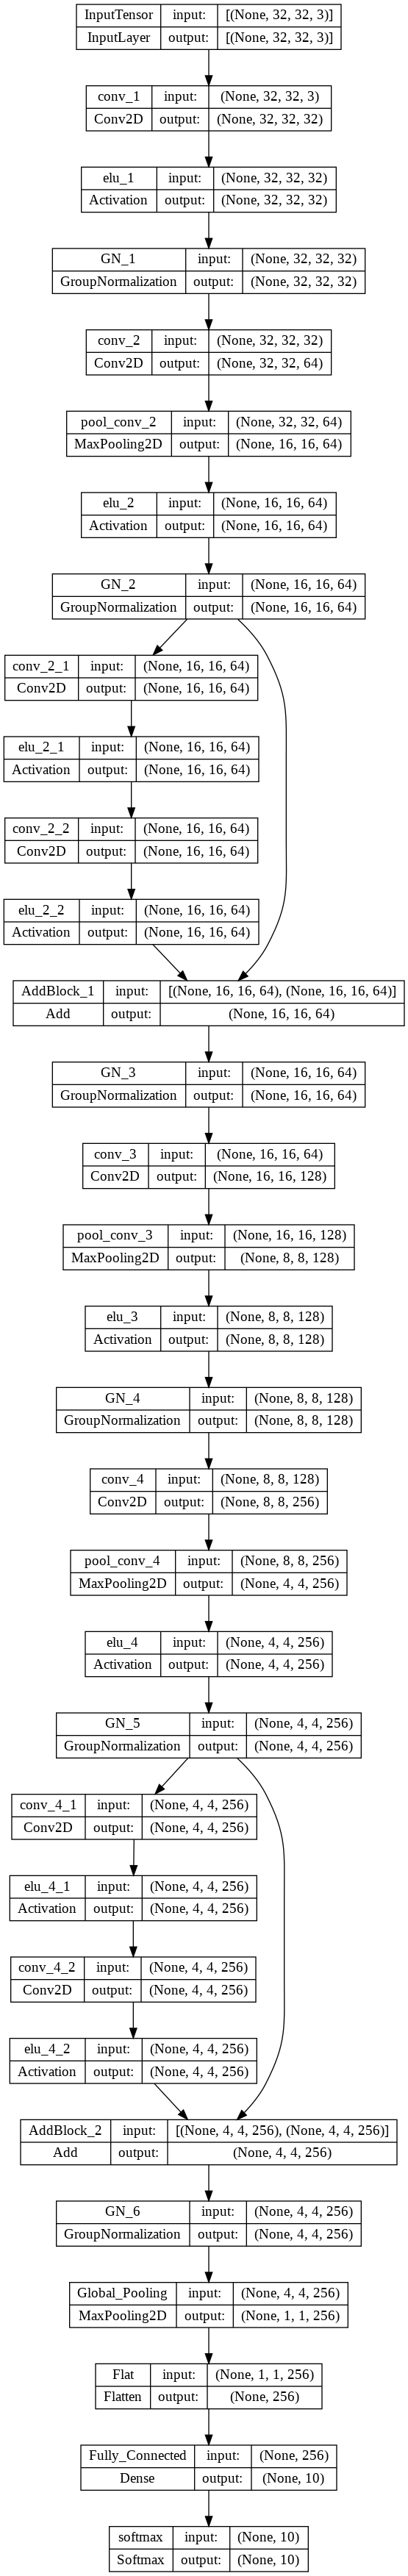

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model_GN.png", show_shapes=True)

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=100 , validation_data=(x_val_n, y_val_b))

Epoch 1/100
88/88 [==============================] - 13s 127ms/step - loss: 2.4315 - accuracy: 0.1812 - val_loss: 2.1034 - val_accuracy: 0.2276
Epoch 2/100
88/88 [==============================] - 11s 122ms/step - loss: 1.9546 - accuracy: 0.3068 - val_loss: 1.8369 - val_accuracy: 0.3584
Epoch 3/100
88/88 [==============================] - 11s 121ms/step - loss: 1.6903 - accuracy: 0.4092 - val_loss: 1.6022 - val_accuracy: 0.4244
Epoch 4/100
88/88 [==============================] - 11s 120ms/step - loss: 1.4937 - accuracy: 0.4740 - val_loss: 1.3863 - val_accuracy: 0.5100
Epoch 5/100
88/88 [==============================] - 10s 119ms/step - loss: 1.3625 - accuracy: 0.5222 - val_loss: 1.3523 - val_accuracy: 0.5140
Epoch 6/100
88/88 [==============================] - 10s 119ms/step - loss: 1.2769 - accuracy: 0.5514 - val_loss: 1.3039 - val_accuracy: 0.5390
Epoch 7/100
88/88 [==============================] - 10s 119ms/step - loss: 1.1791 - accuracy: 0.5883 - val_loss: 1.2723 - val_accuracy:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_GN.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


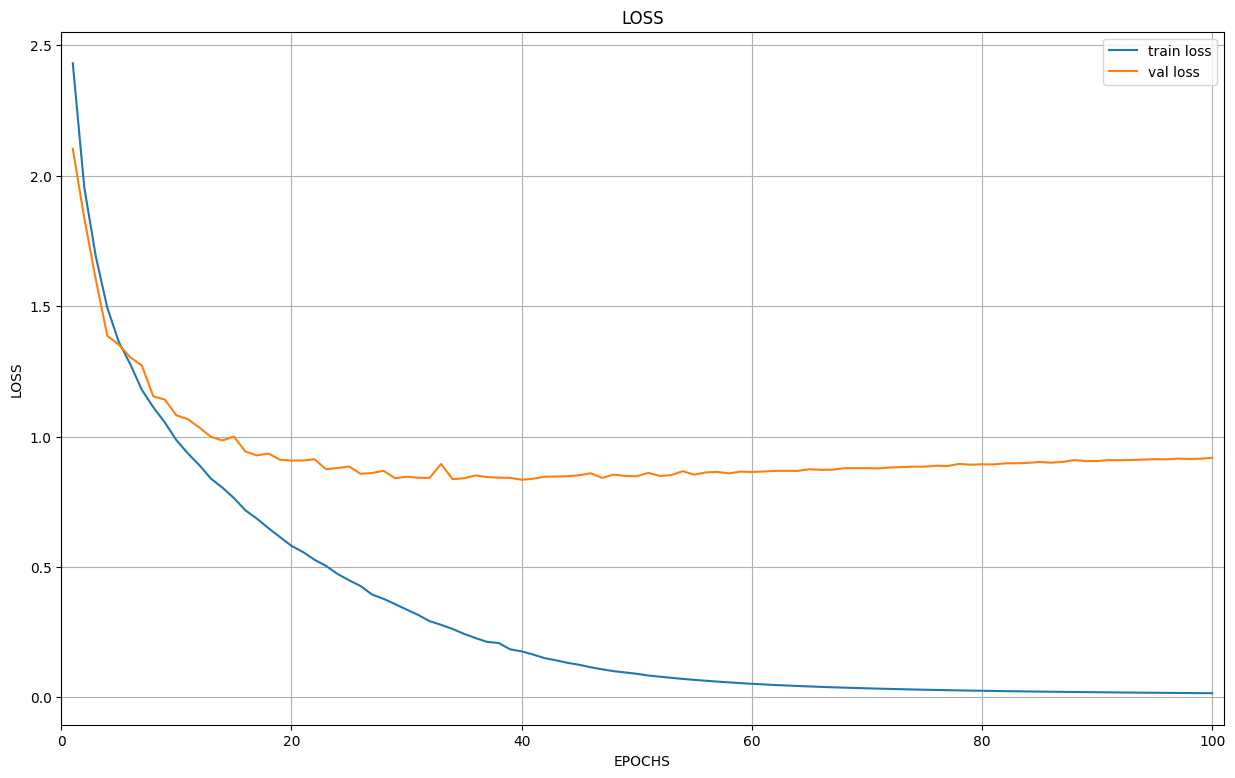

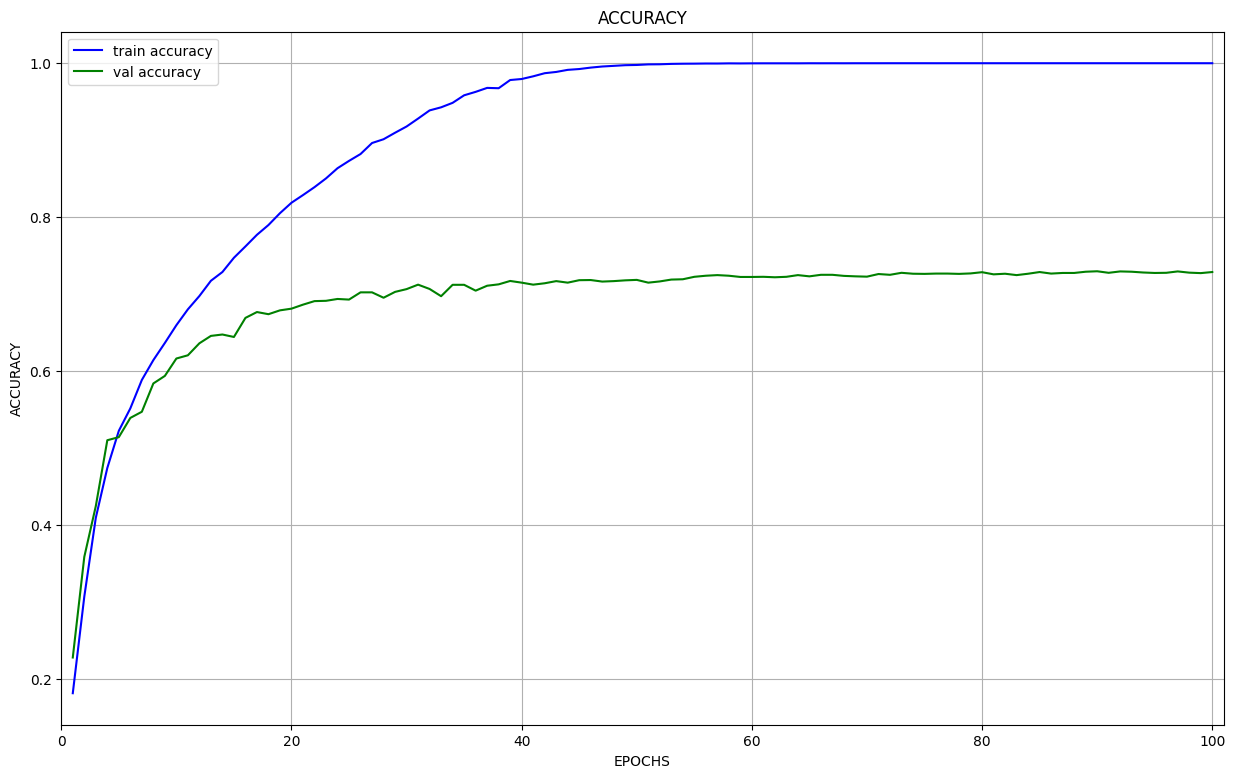

In [ ]:
drive.mount('/content/drive')
import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_GN_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_GN_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 2s 5ms/step - loss: 0.9340 - accuracy: 0.7278
[0.9339990019798279, 0.7278000116348267]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 2s 4ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


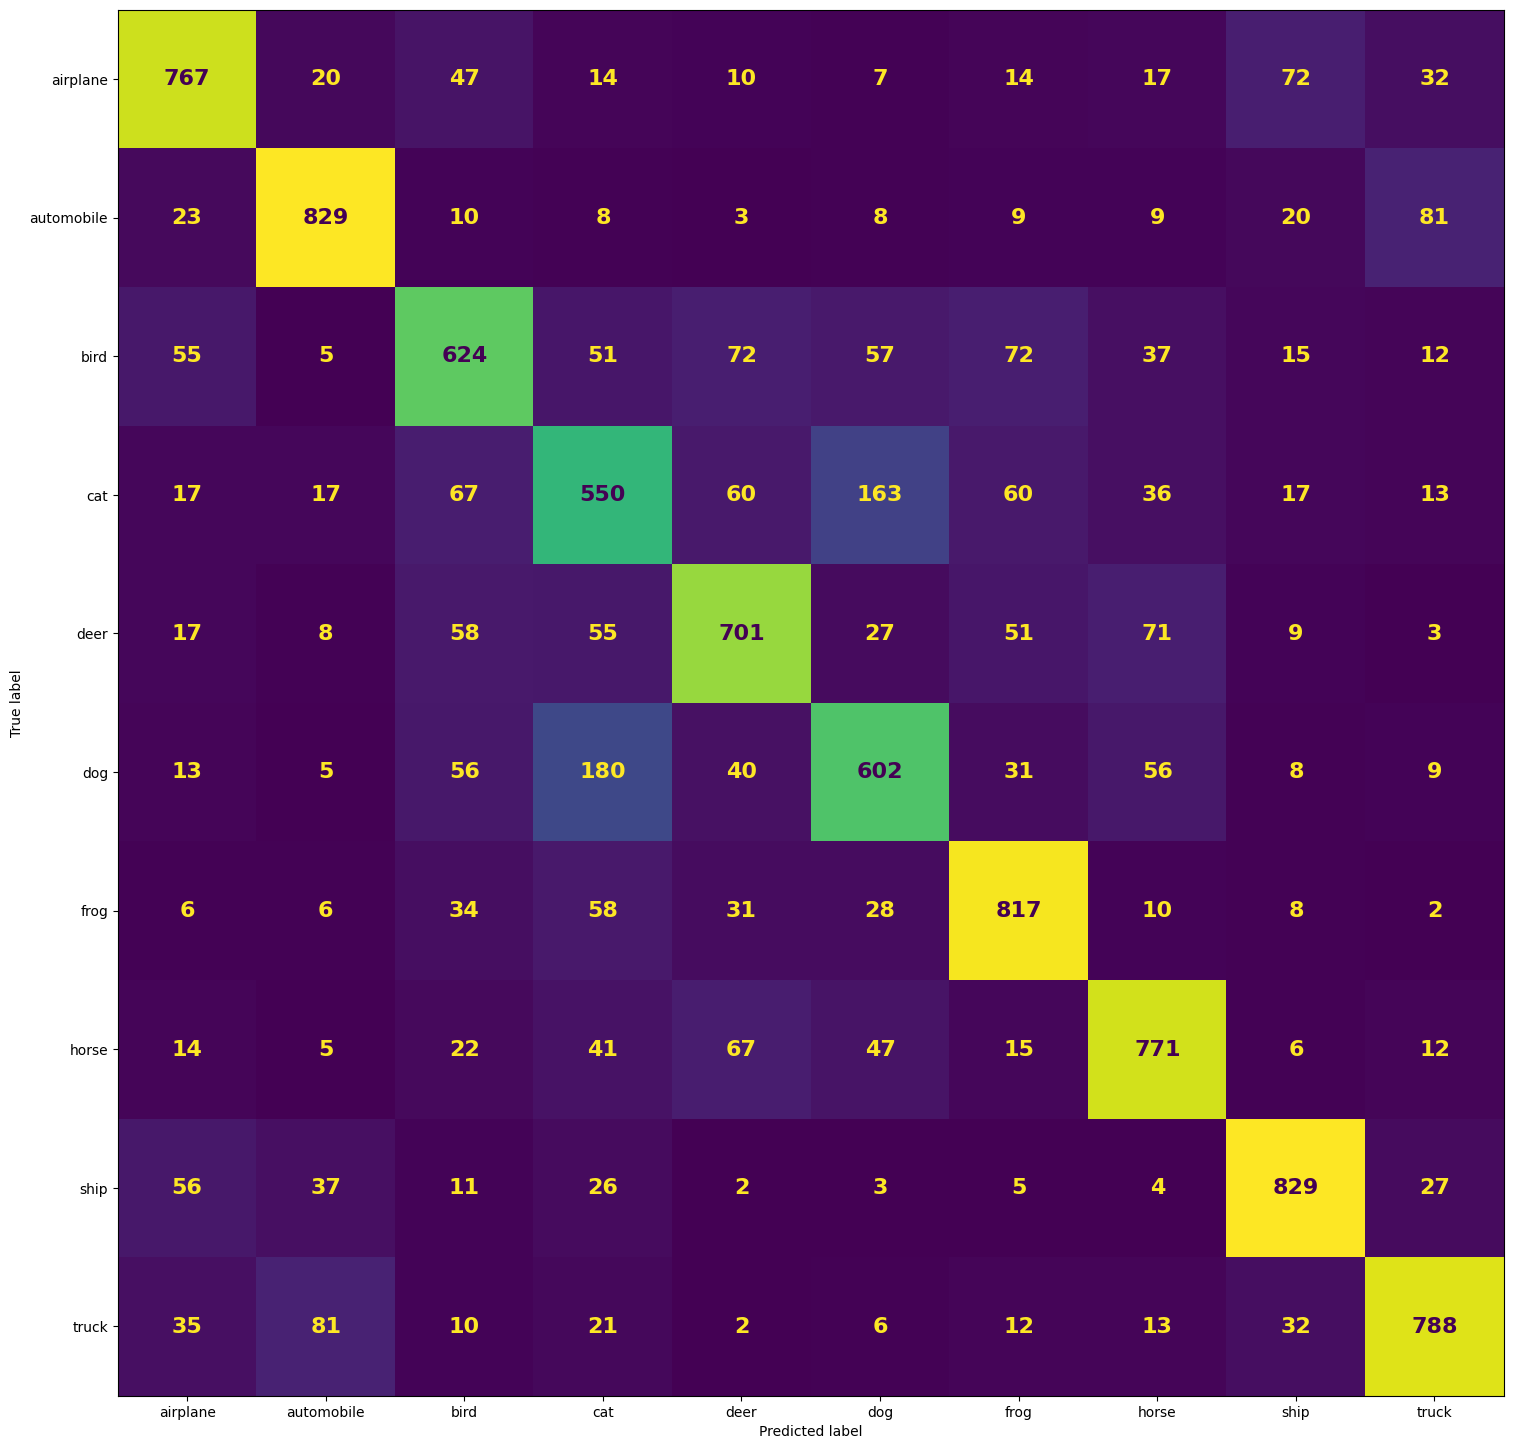

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_GN.jpg')
#

# Problem 2:

### Data Augmentation Effect:

Data Augmentation:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

Define a ResNet like Network Designer function:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)                                        #2
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)                                        #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)                                        #15
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

Define Model, Optimizer and Loss Function:

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like_DA")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Summary of The Model:

In [ ]:
model_1.summary()

Model: "ResNet_Like_DA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 32, 32, 64)   18496       ['elu_1[0][0]']                  
                                                                                     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


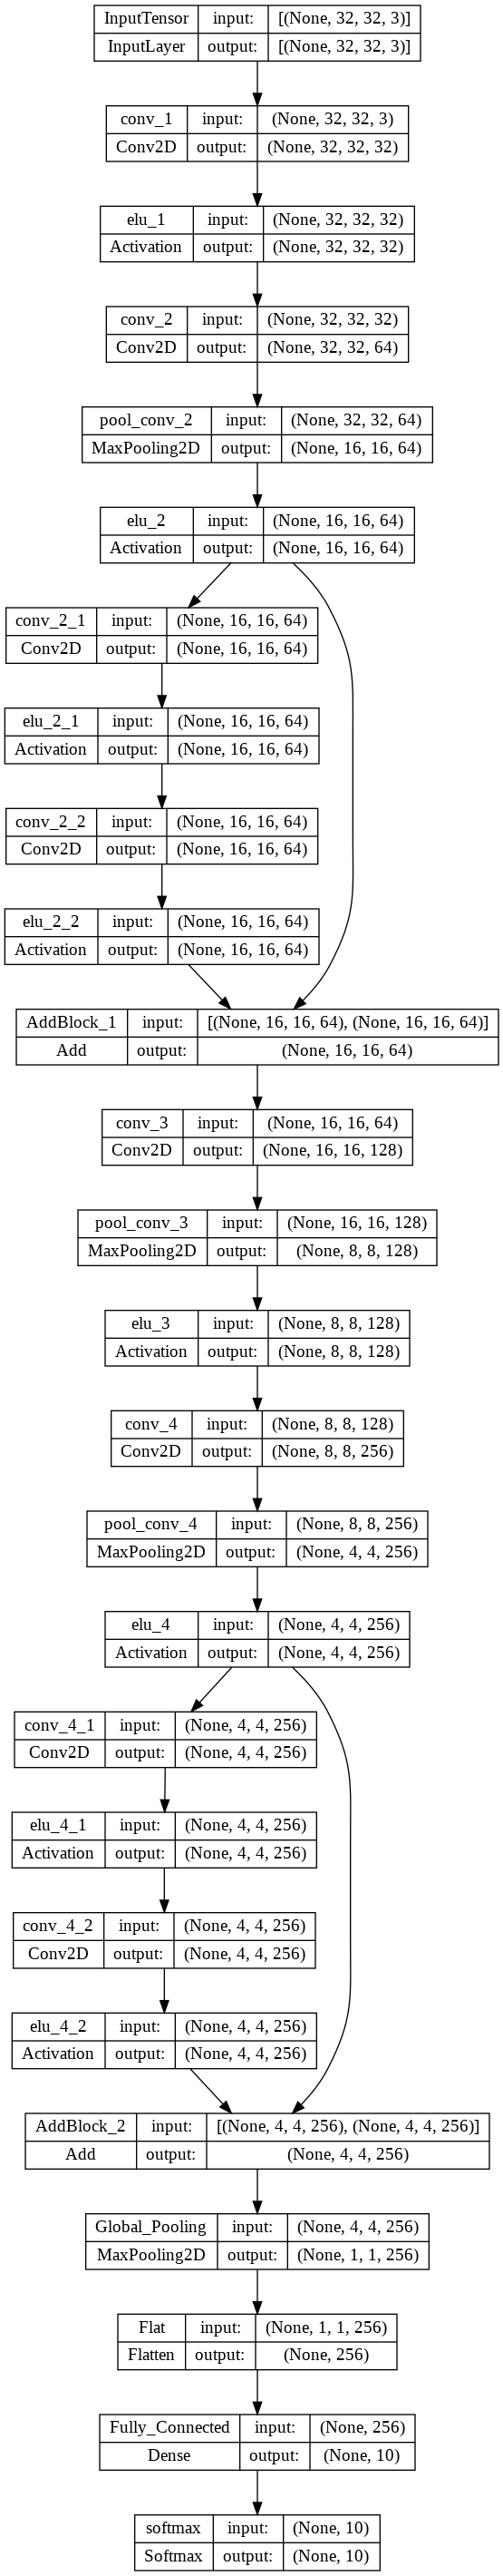

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model_DA.png", show_shapes=True)

Train The Midel:

In [ ]:
history=model_1.fit_generator(train_gen.flow(x_train_n, y_train_b, batch_size=512), epochs=100 , steps_per_epoch=int(len(x_train_n)/512), validation_data=(x_val_n, y_val_b))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
87/87 [==============================] - 35s 288ms/step - loss: 2.2395 - accuracy: 0.1971 - val_loss: 2.1443 - val_accuracy: 0.2758
Epoch 2/100
87/87 [==============================] - 25s 284ms/step - loss: 2.1111 - accuracy: 0.2433 - val_loss: 1.9948 - val_accuracy: 0.3128
Epoch 3/100
87/87 [==============================] - 24s 280ms/step - loss: 2.0102 - accuracy: 0.2810 - val_loss: 1.8889 - val_accuracy: 0.3388
Epoch 4/100
87/87 [==============================] - 24s 271ms/step - loss: 1.9358 - accuracy: 0.3046 - val_loss: 1.8085 - val_accuracy: 0.3546
Epoch 5/100
87/87 [==============================] - 24s 273ms/step - loss: 1.8856 - accuracy: 0.3241 - val_loss: 1.7469 - val_accuracy: 0.3924
Epoch 6/100
87/87 [==============================] - 23s 266ms/step - loss: 1.8459 - accuracy: 0.3400 - val_loss: 1.7161 - val_accuracy: 0.4100
Epoch 7/100
87/87 [==============================] - 23s 264ms/step - loss: 1.7981 - accuracy: 0.3595 - val_loss: 1.6564 - val_accuracy:

Save Trained Model:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_DA.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


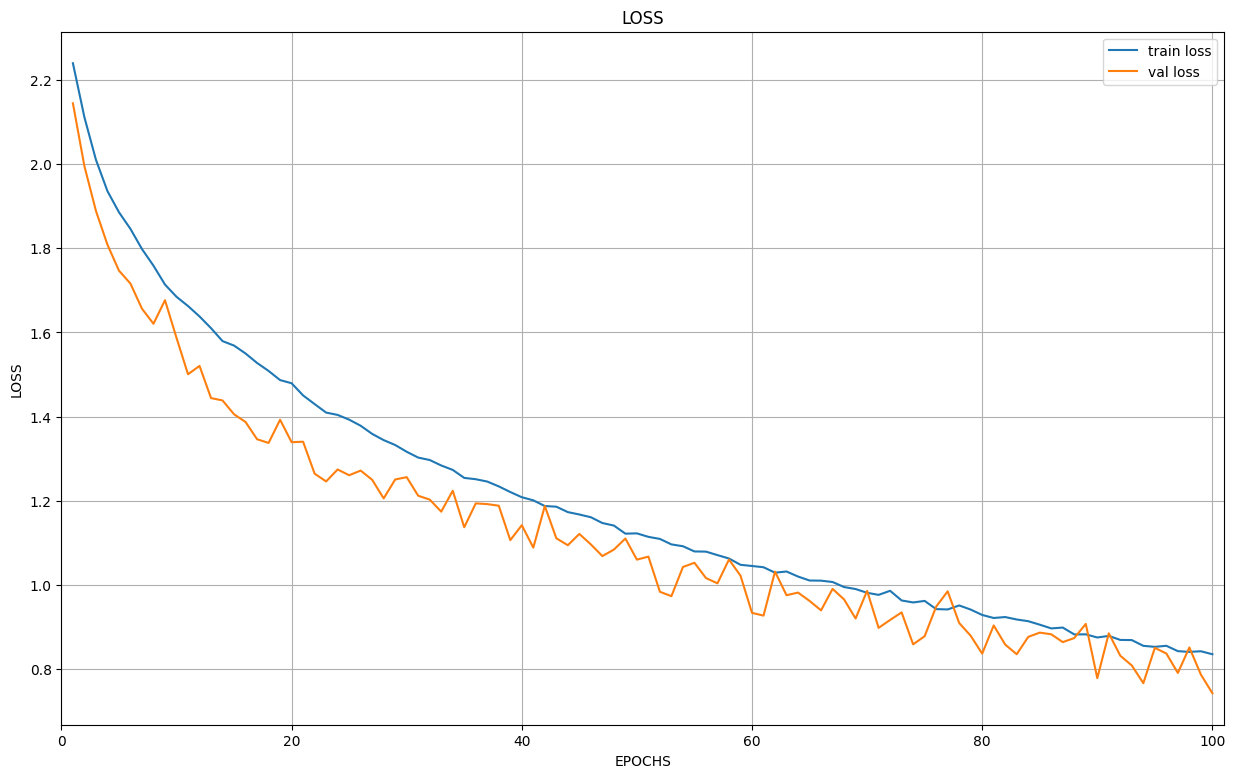

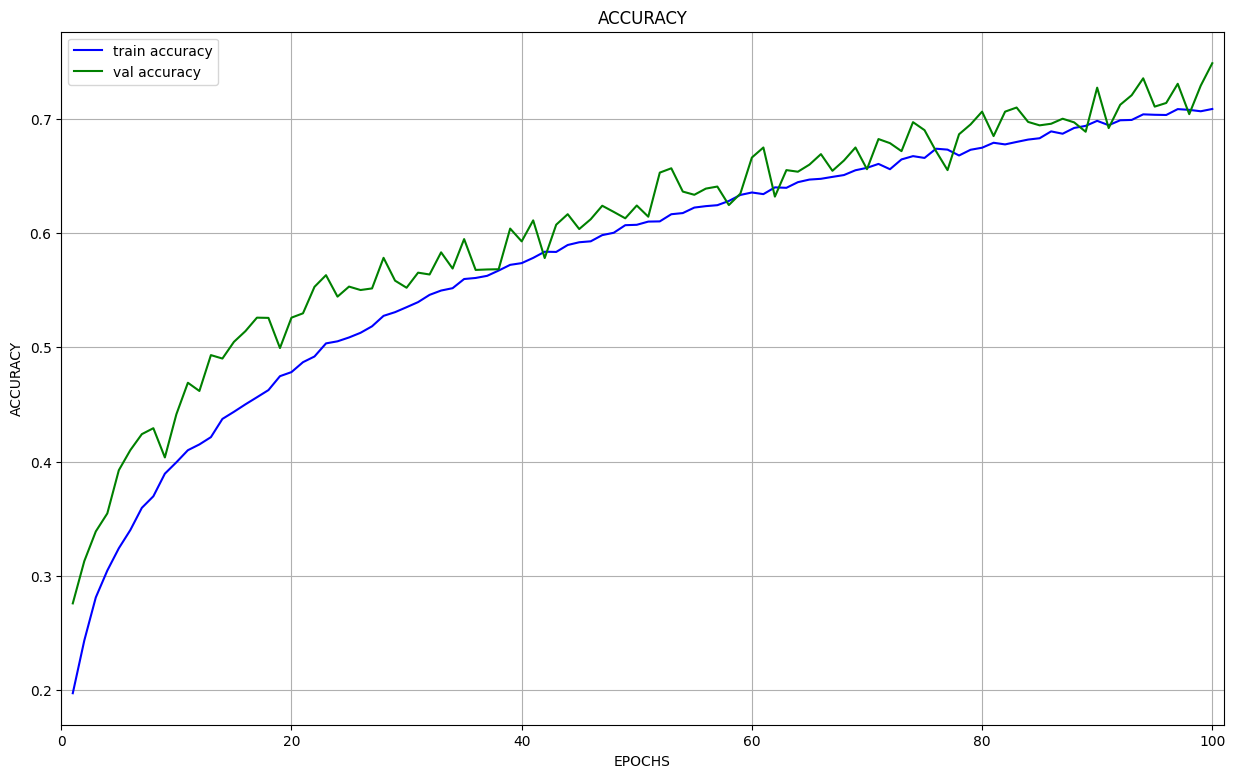

In [ ]:
drive.mount('/content/drive')
import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_DA_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_DA_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 2s 5ms/step - loss: 0.7680 - accuracy: 0.7360
[0.7680085301399231, 0.7360000014305115]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 1s 3ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


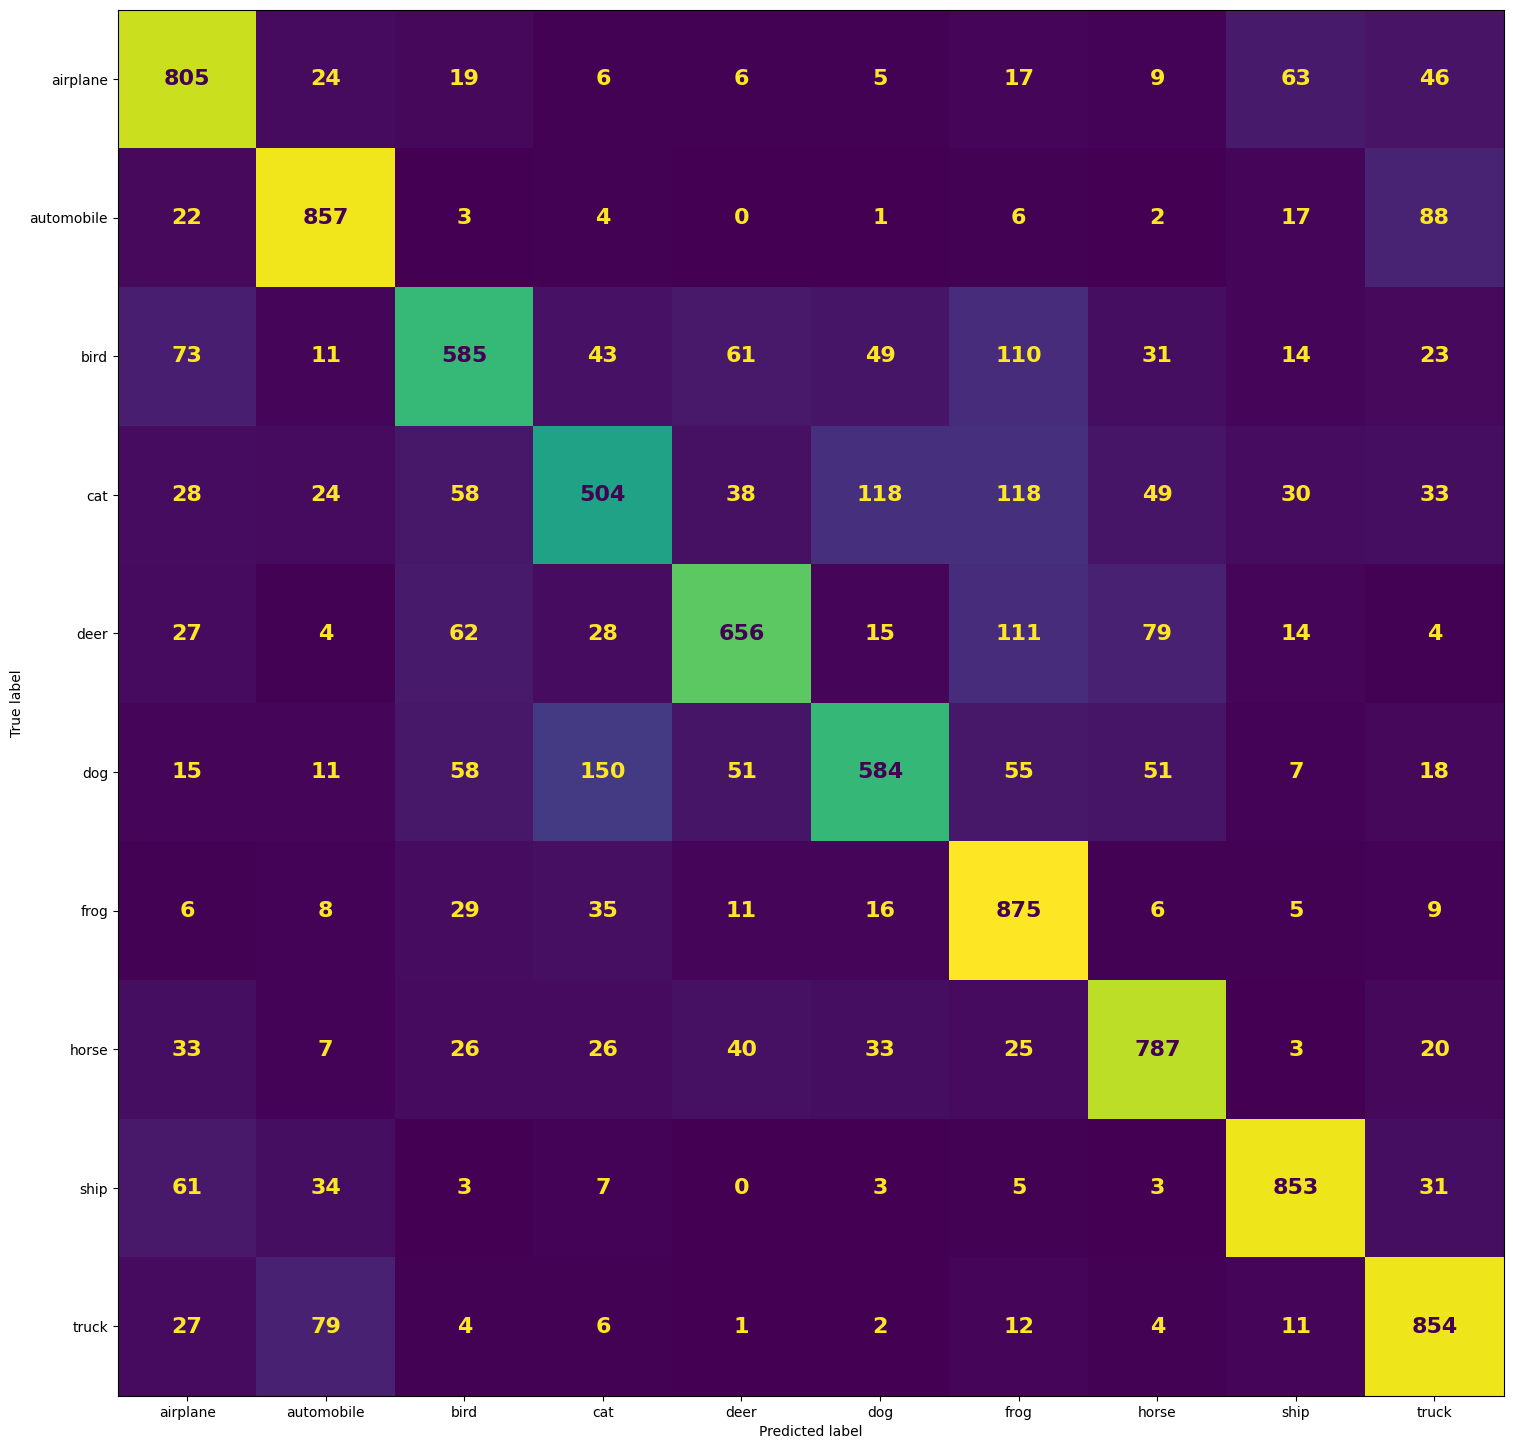

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_DA.jpg')
#

### Drop out Effect:

Define a ResNet like Network Designer function with Drop out Layers:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)
  x = Dropout(0.25 , name='Dropout_1')(x)                                      #2
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)
  x = Dropout(0.25 , name='Dropout_2')(x)                                      #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  x = Dropout(0.25 , name='Dropout_3')(x)
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  x = Dropout(0.25 , name='Dropout_4')(x)
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)
  x = Dropout(0.25 , name='Dropout_5')(x)                                      #15
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = Dropout(0.25 , name='Dropout_6')(x)
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

Define Model, Optimizer and Loss Function:

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like_Dropout")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Summary of The Model:

In [ ]:
model_1.summary()

Model: "ResNet_Like_Dropout"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 Dropout_1 (Dropout)            (None, 32, 32, 32)   0           ['elu_1[0][0]']                  
                                                                                

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


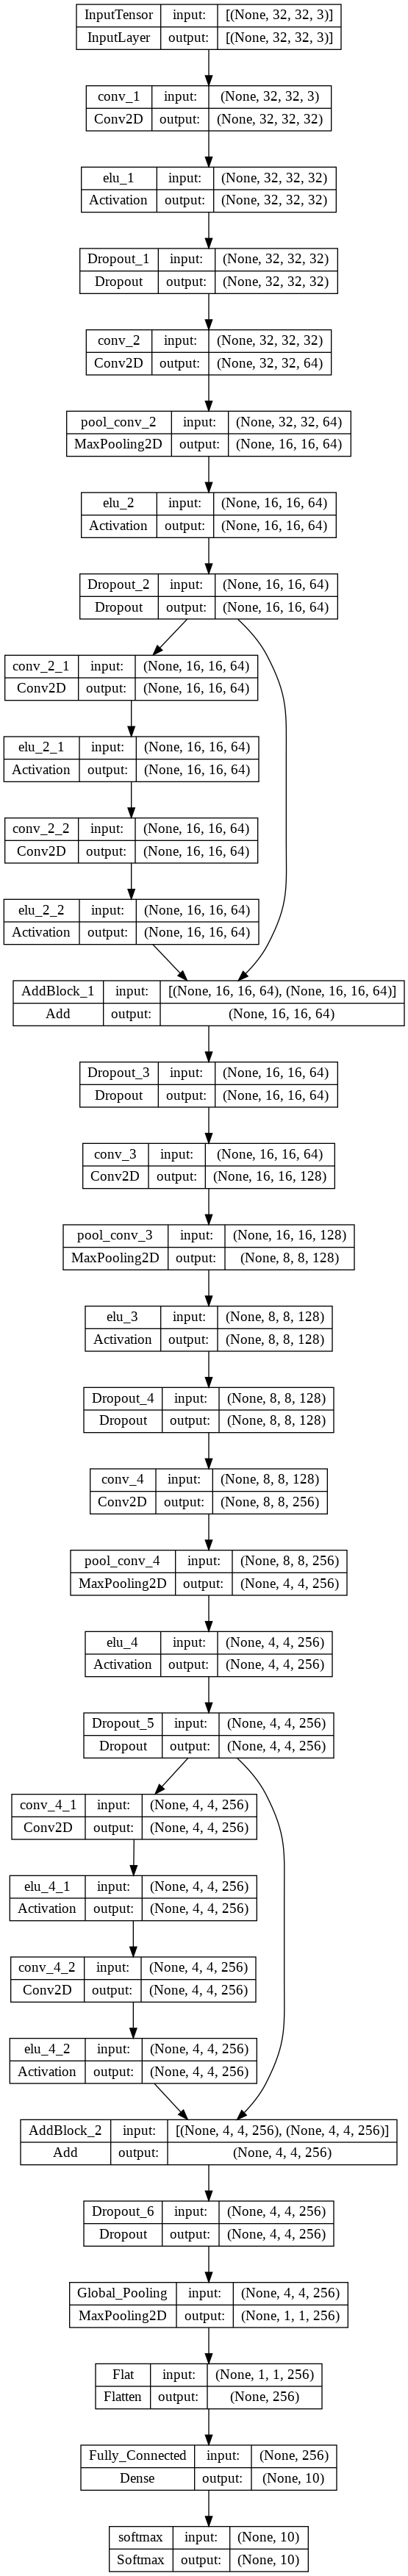

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model_Dropout.png", show_shapes=True)

Train The Midel:

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=100 , validation_data=(x_val_n, y_val_b))

Epoch 1/100
88/88 [==============================] - 20s 109ms/step - loss: 2.2568 - accuracy: 0.1510 - val_loss: 2.1789 - val_accuracy: 0.1906
Epoch 2/100
88/88 [==============================] - 7s 84ms/step - loss: 2.1038 - accuracy: 0.2183 - val_loss: 2.0815 - val_accuracy: 0.2242
Epoch 3/100
88/88 [==============================] - 7s 84ms/step - loss: 2.0259 - accuracy: 0.2566 - val_loss: 2.0305 - val_accuracy: 0.2464
Epoch 4/100
88/88 [==============================] - 8s 85ms/step - loss: 1.9730 - accuracy: 0.2832 - val_loss: 2.0951 - val_accuracy: 0.2004
Epoch 5/100
88/88 [==============================] - 8s 87ms/step - loss: 1.9131 - accuracy: 0.3105 - val_loss: 1.9490 - val_accuracy: 0.2662
Epoch 6/100
88/88 [==============================] - 7s 85ms/step - loss: 1.8508 - accuracy: 0.3316 - val_loss: 1.8655 - val_accuracy: 0.3202
Epoch 7/100
88/88 [==============================] - 8s 86ms/step - loss: 1.7918 - accuracy: 0.3507 - val_loss: 1.8540 - val_accuracy: 0.3166
Epoc

Save Trained Model:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_Dropout.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


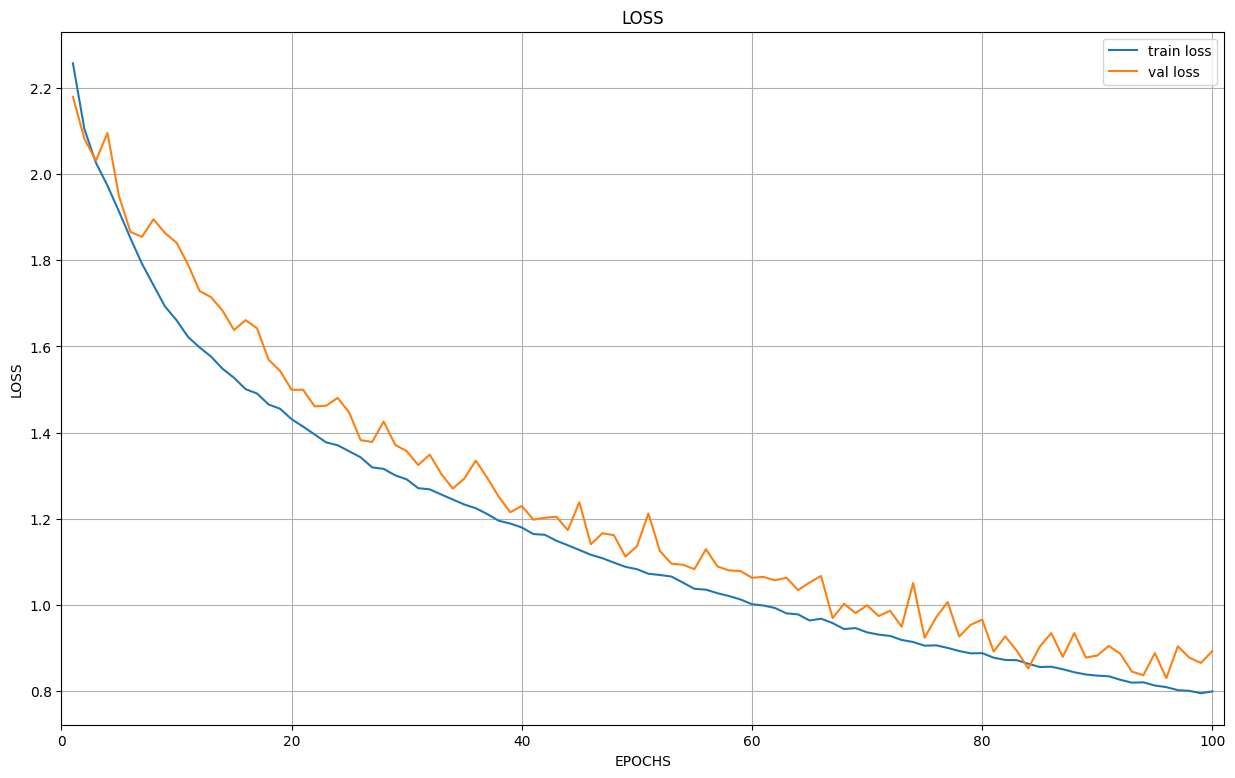

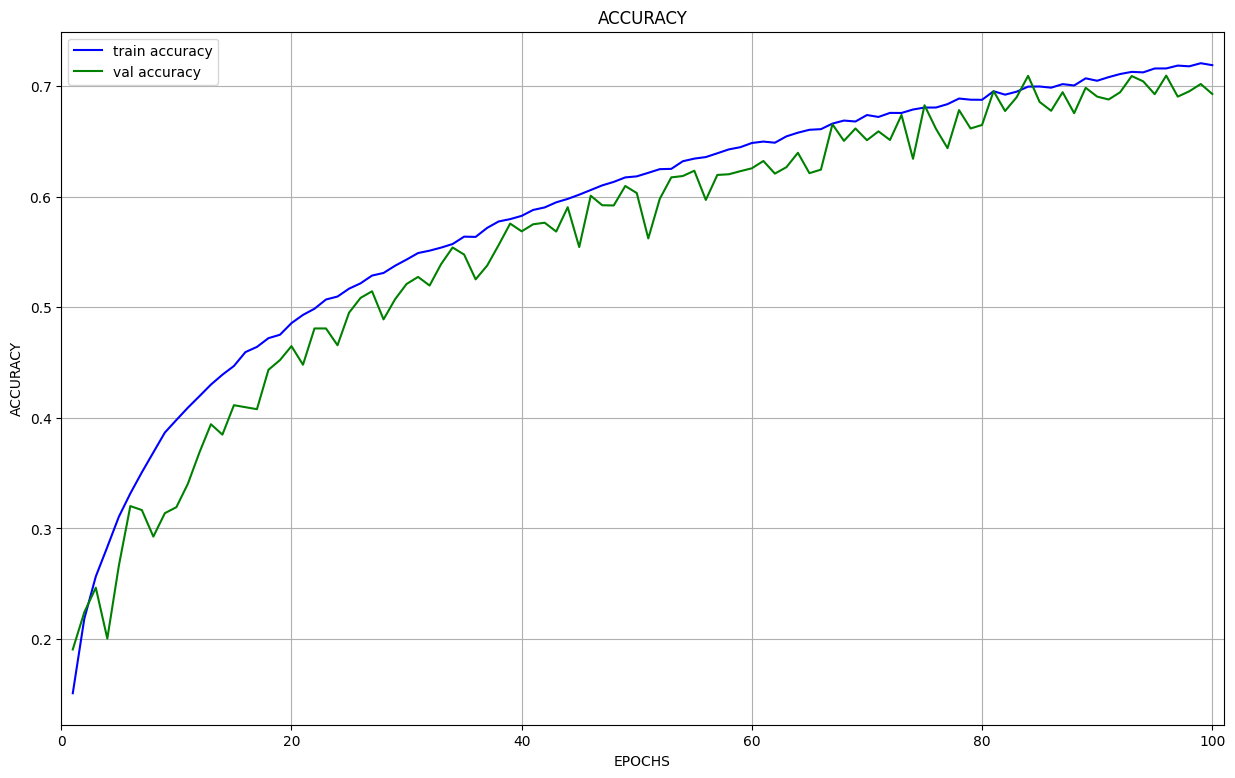

In [ ]:
drive.mount('/content/drive')
import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_Dropout_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_Dropout_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 2s 5ms/step - loss: 0.9082 - accuracy: 0.6831
[0.9081856608390808, 0.6830999851226807]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 1s 3ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


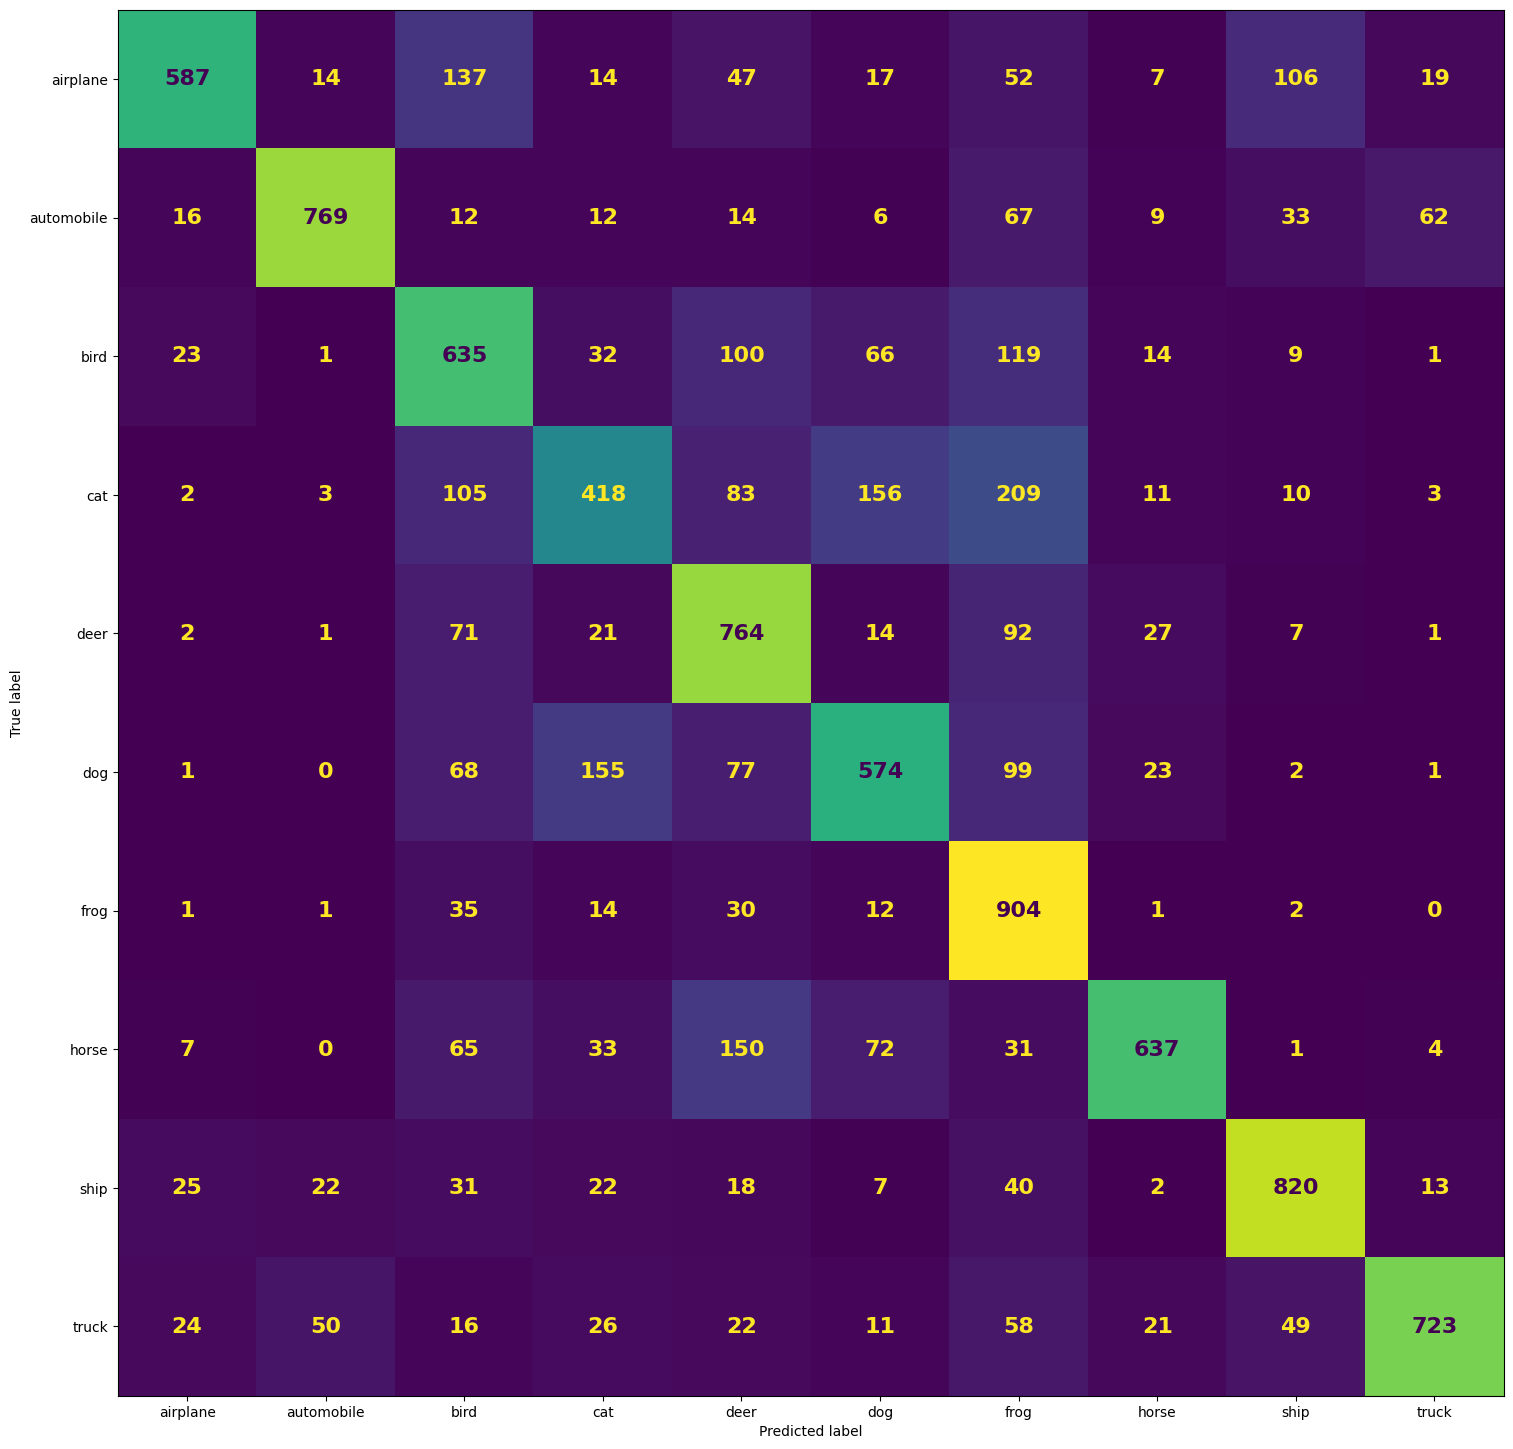

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_Dropout.jpg')
#

### Reduceing learning rate Effect:

Define a ResNet like Network Designer function:

In [ ]:
def Custom_ResNet(input_shape,Name):
  input = Input(shape=input_shape , name='InputTensor')
  #Layer 0:
  x = input
  x = Conv2D(filters=32,kernel_size=3,padding="same",name='conv_1')(x)         #1
  x = Activation('elu',name='elu_1')(x)                                        #2
  #Layer 1:
  x = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2')(x)         #3
  x = MaxPooling2D(pool_size=2, name='pool_conv_2')(x)                         #4
  x = Activation('elu',name='elu_2')(x)                                        #5
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_1')(x)      #6
  R1 = Activation('elu',name='elu_2_1')(R1)                                    #7
  R1 = Conv2D(filters=64,kernel_size=3,padding="same",name='conv_2_2')(R1)     #8
  R1 = Activation('elu',name='elu_2_2')(R1)                                    #9
  x = Add(name='AddBlock_1')([x, R1])
  #Layer 2:
  x = Conv2D(filters=128,kernel_size=3,padding="same",name='conv_3')(x)        #10
  x = MaxPooling2D(pool_size=2,name='pool_conv_3')(x)                          #11
  x = Activation('elu',name='elu_3')(x)                                        #12
  #Layer 3:
  x = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4')(x)        #13
  x = MaxPooling2D(pool_size=2,name='pool_conv_4')(x)                          #14
  x = Activation('elu',name='elu_4')(x)                                        #15
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_1')(x)     #16
  R2 = Activation('elu',name='elu_4_1')(R2)                                    #17
  R2 = Conv2D(filters=256,kernel_size=3,padding="same",name='conv_4_2')(R2)    #18
  R2 = Activation('elu',name='elu_4_2')(R2)                                    #19
  x = Add(name='AddBlock_2')([x, R2])
  x = MaxPooling2D(pool_size=3,name='Global_Pooling')(x)                       #20
  # Fully Connected Layer:
  x = Flatten(name='Flat')(x)
  x = Dense(10,name='Fully_Connected')(x)                                      #21
  output = Softmax(axis=1,name='softmax')(x)

  model =keras.Model(inputs=input, outputs=output, name=Name)

  return model

Define Model, Optimizer and Loss Function:

In [ ]:
model_1 = Custom_ResNet(input_shape=(32, 32, 3), Name = "ResNet_Like_DLR")
opt=keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Define a callback function to reduce learning rate during the training:

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduceing_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

Summary of The Model:

In [ ]:
model_1.summary()

Model: "ResNet_Like_DLR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputTensor (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   896         ['InputTensor[0][0]']            
                                                                                                  
 elu_1 (Activation)             (None, 32, 32, 32)   0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 32, 32, 64)   18496       ['elu_1[0][0]']                  
                                                                                    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


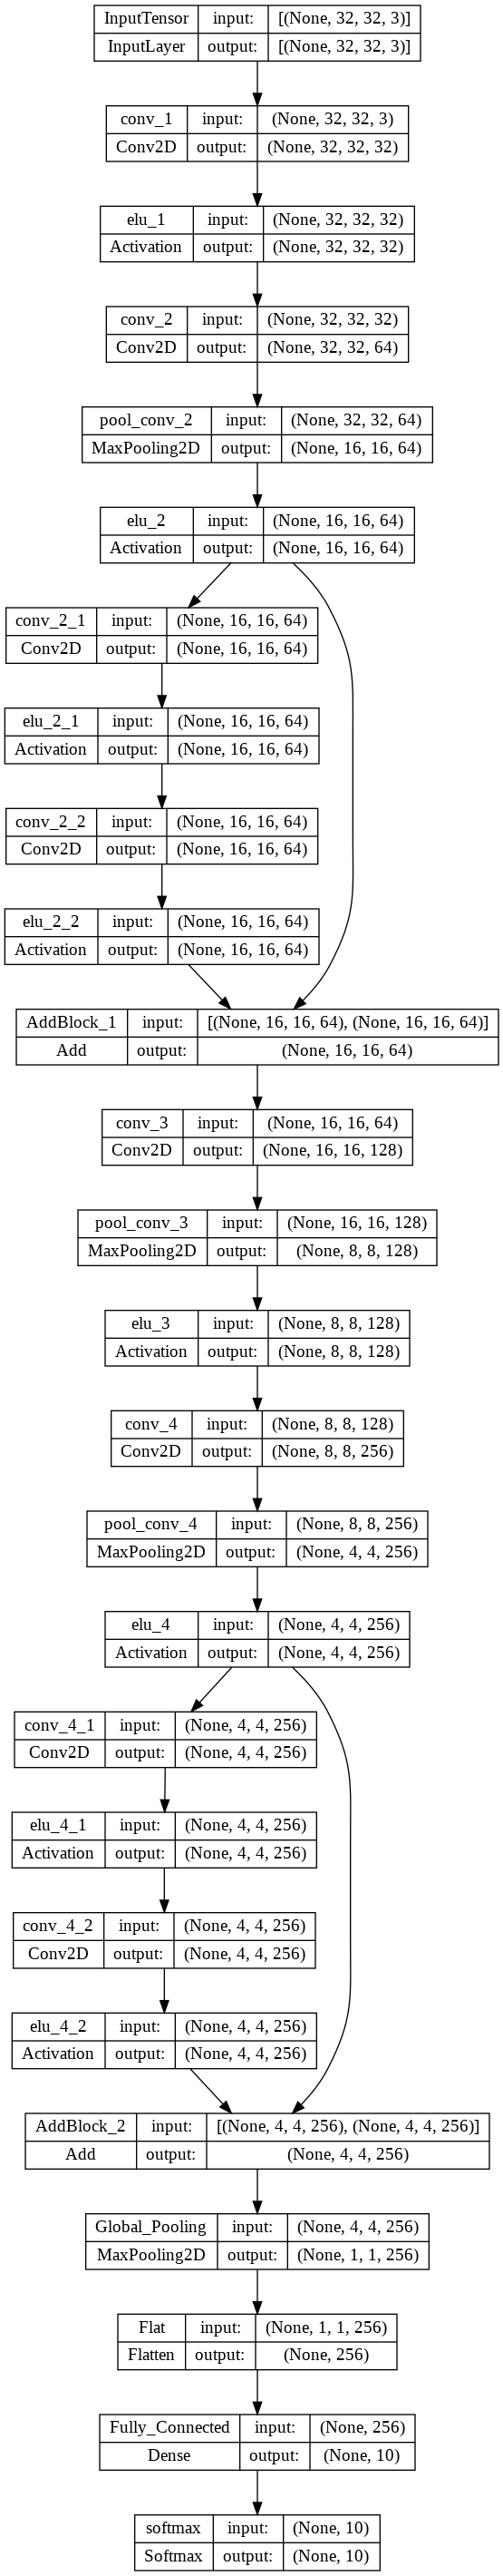

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(model_1, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/picfirst_model_DLR.png", show_shapes=True)

Train The Midel:

In [ ]:
history=model_1.fit(x=x_train_n,y=y_train_b, batch_size=512 , epochs=100 , validation_data=(x_val_n, y_val_b),callbacks=[reduceing_LR])

Epoch 1/100
88/88 [==============================] - 7s 79ms/step - loss: 2.2169 - accuracy: 0.2196 - val_loss: 2.1081 - val_accuracy: 0.2432 - lr: 0.0100
Epoch 2/100
88/88 [==============================] - 7s 76ms/step - loss: 2.0549 - accuracy: 0.2781 - val_loss: 1.9660 - val_accuracy: 0.2924 - lr: 0.0100
Epoch 3/100
88/88 [==============================] - 7s 77ms/step - loss: 1.9155 - accuracy: 0.3269 - val_loss: 1.8490 - val_accuracy: 0.3480 - lr: 0.0100
Epoch 4/100
88/88 [==============================] - 7s 77ms/step - loss: 1.8115 - accuracy: 0.3628 - val_loss: 1.7234 - val_accuracy: 0.3928 - lr: 0.0100
Epoch 5/100
88/88 [==============================] - 7s 78ms/step - loss: 1.7323 - accuracy: 0.3914 - val_loss: 1.6669 - val_accuracy: 0.4094 - lr: 0.0100
Epoch 6/100
88/88 [==============================] - 7s 77ms/step - loss: 1.6500 - accuracy: 0.4192 - val_loss: 1.6182 - val_accuracy: 0.4270 - lr: 0.0100
Epoch 7/100
88/88 [==============================] - 7s 76ms/step - lo

Save Trained Model:

In [ ]:
drive.mount('/content/drive')
model_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/model//model_DLR.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Loss and Accuracy Diagrams:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


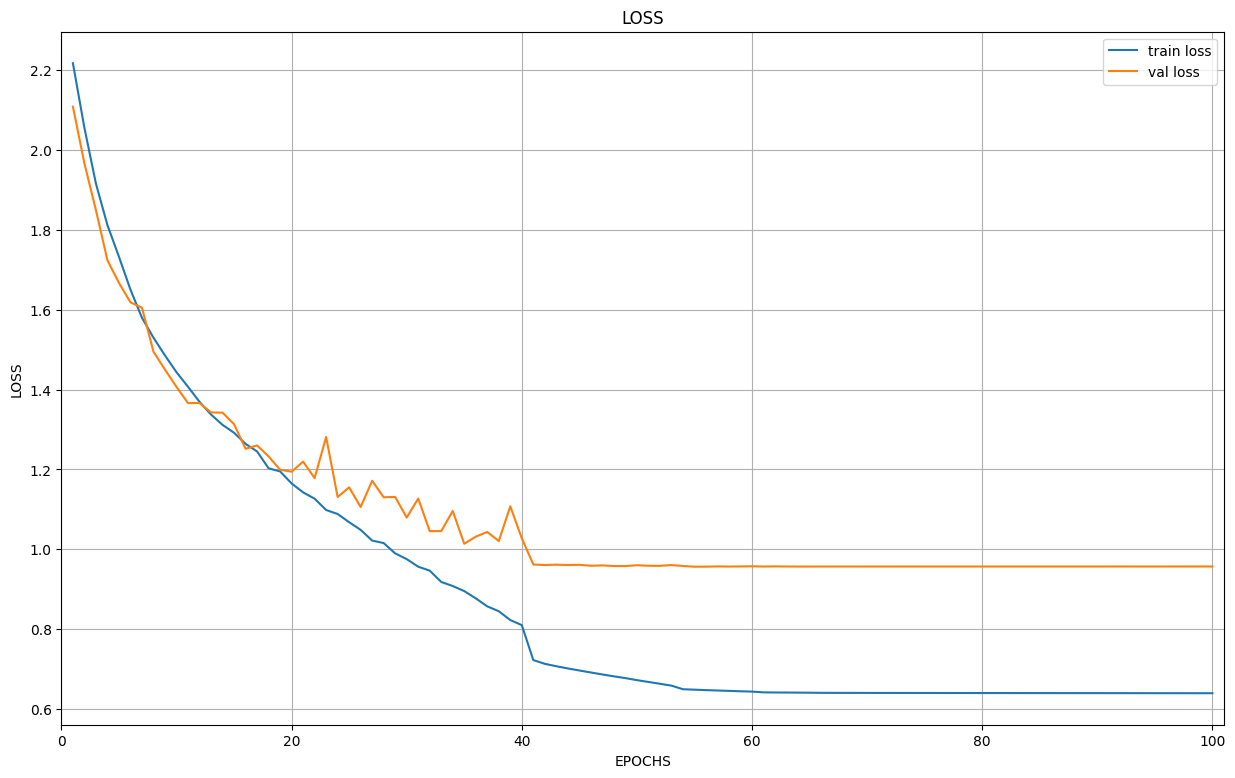

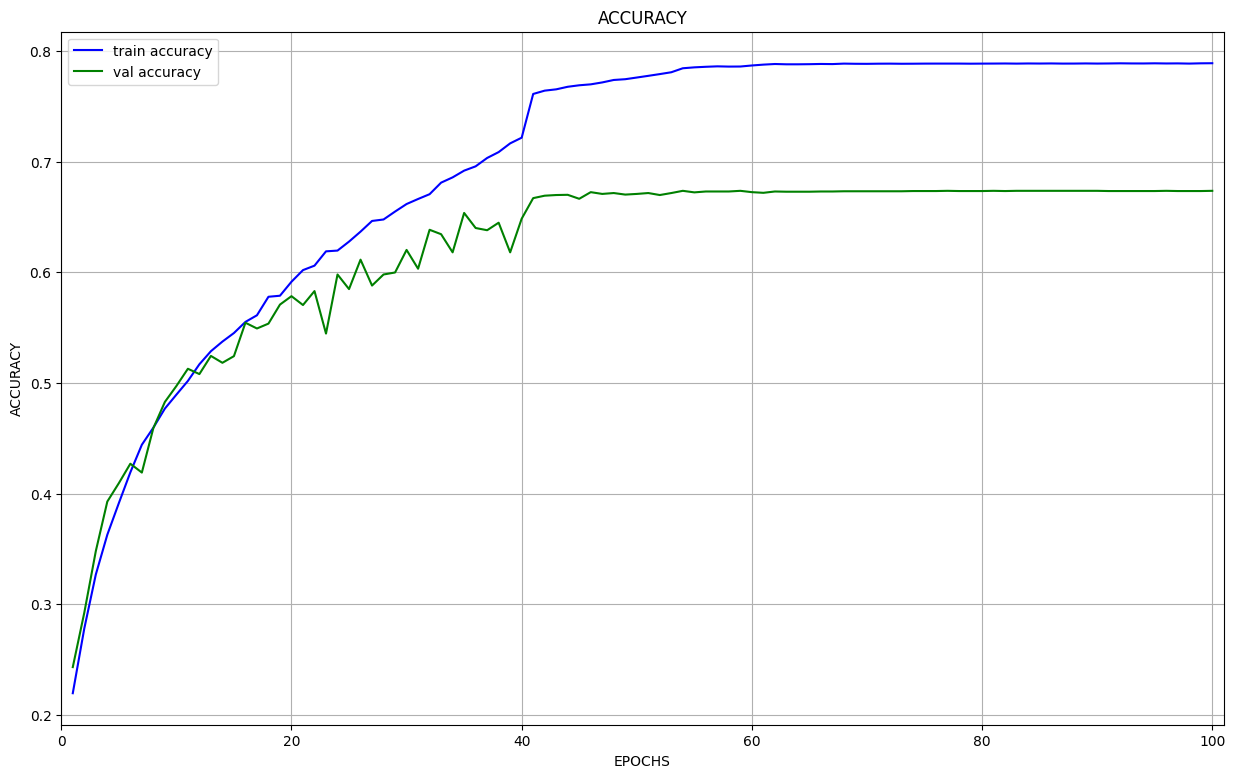

In [ ]:
drive.mount('/content/drive')
import matplotlib
matplotlib.style.use('default')
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
EPOCH= range(1,101)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,101])
plt.legend(['train loss','val loss'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_DLR_Loss.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,101])
plt.legend(['train accuracy','val accuracy'])

plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//model_DLR_Acc.jpg')
plt.show()


**Model Evaluation on Test Data:**

In [ ]:
evaluation = model_1.evaluate(x_test_n, y_test_b)
print(evaluation)

313/313 [==============================] - 1s 5ms/step - loss: 0.9733 - accuracy: 0.6657
[0.9732956290245056, 0.6657000184059143]


In [ ]:
# Simple function to decode labels from binary space:
def labeler(y):
  label = np.zeros(len(y))
  for i in range(len(y)):
    Max = max(y[i,:])
    for j in range(10):
      if (y[i,j]==Max):
        label[i]=j
  return label
# Decoding test data predicted labels from binary space:
y_test_p =labeler(model_1.predict(x_test_n))

313/313 [==============================] - 1s 3ms/step


Plot Confusion Matrix for Test Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


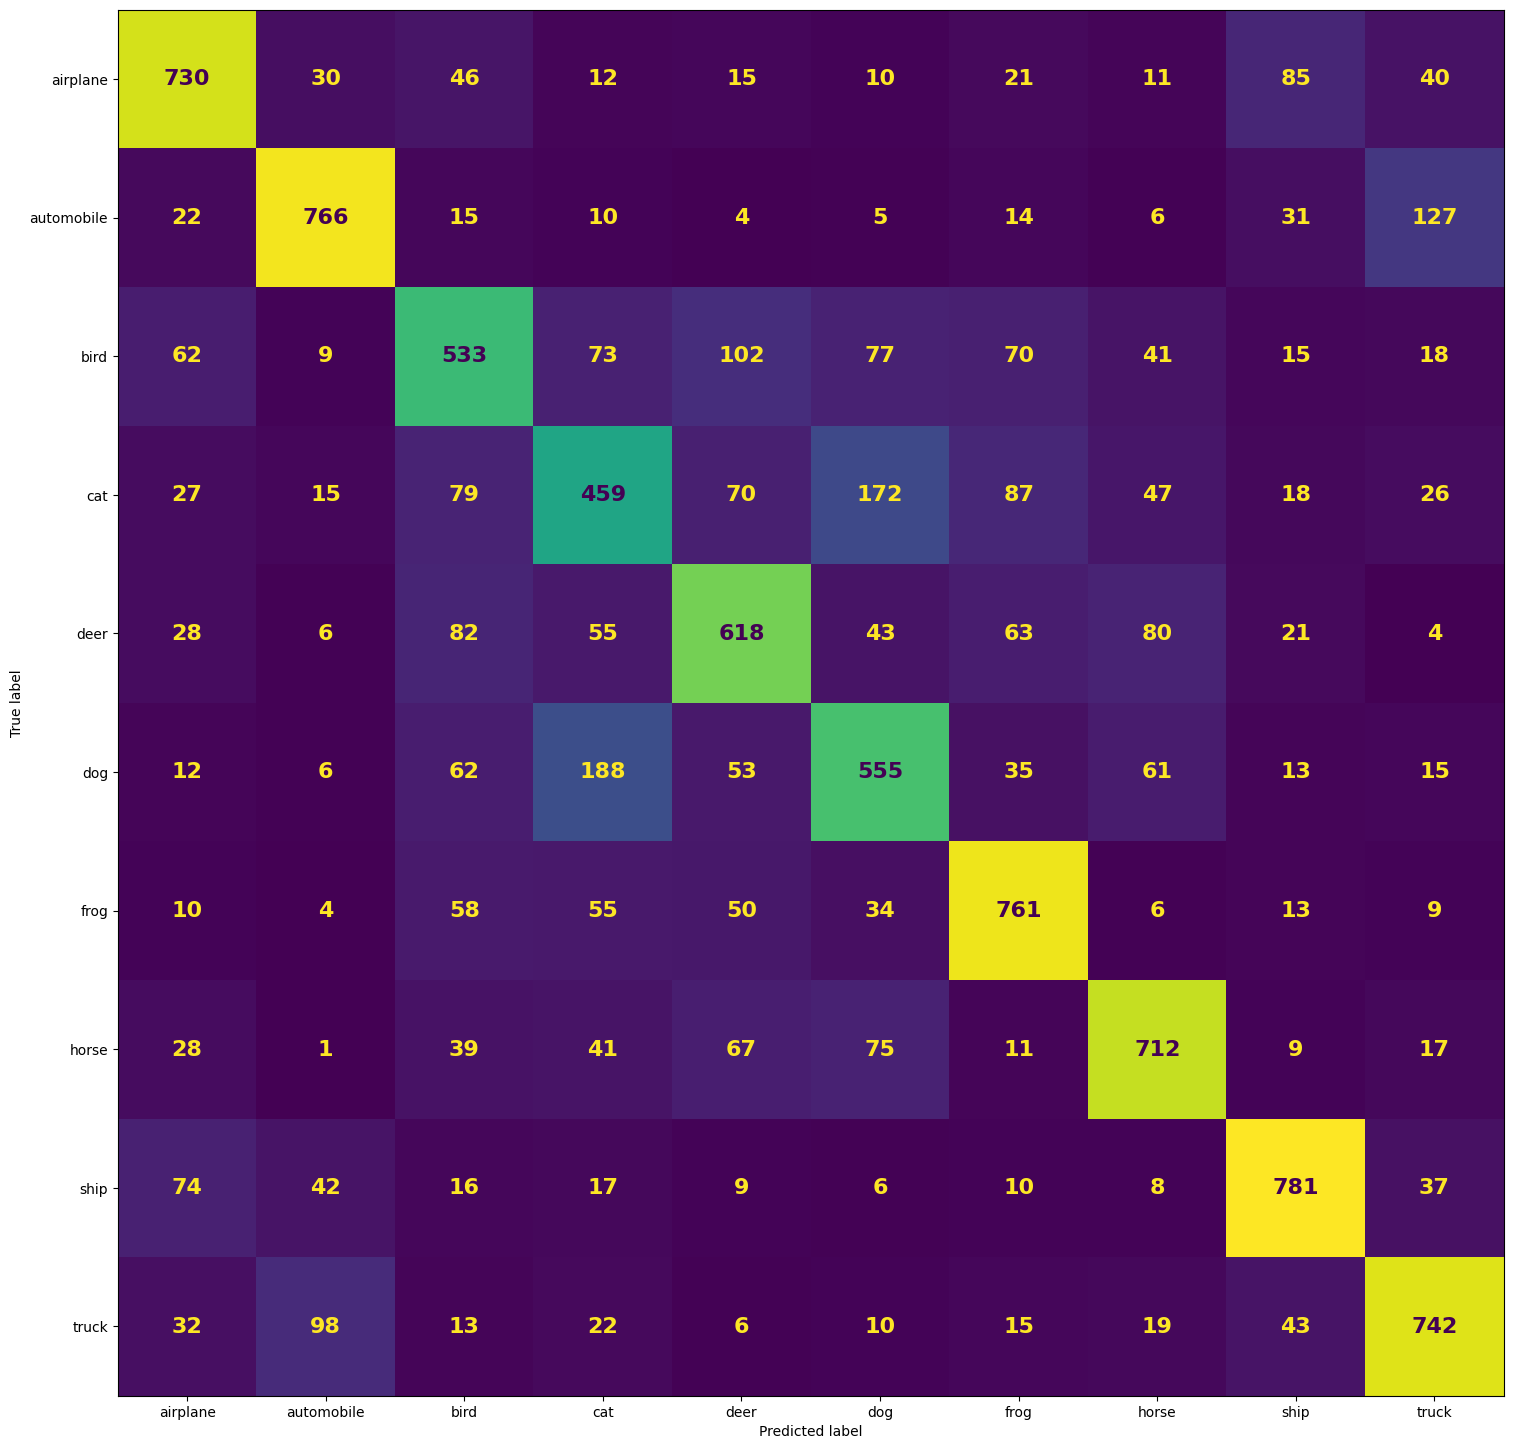

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_test,y_test_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW1/pic//cm_DLR.jpg')
#